## House SalePrice Prediction EDA

### Read the dataset

In [20]:
from warnings import filterwarnings
filterwarnings('ignore')

In [21]:
import pandas as pd
df = pd.read_csv('training_set.csv')
df=df.drop(columns=['Id'])
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

## Perform basic Data quality checks

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [23]:
df.shape

(1460, 80)

In [24]:
s=df.isna().sum()
s[s>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [25]:
df.duplicated().sum()

0

### There are no missing values and duplicated values in this dataset

# Descriptive Analytics

## Determine categorical and continuous features 

In [26]:
cat = list(df.columns[df.dtypes=='object'])
con = list(df.columns[df.dtypes!='object'])

In [27]:
cat[:5]

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour']

In [28]:
con[:5]

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond']

In [29]:
df[cat].describe()

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

In [30]:
df[con].describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

# Data Visualisation

## Univariate Analysis

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

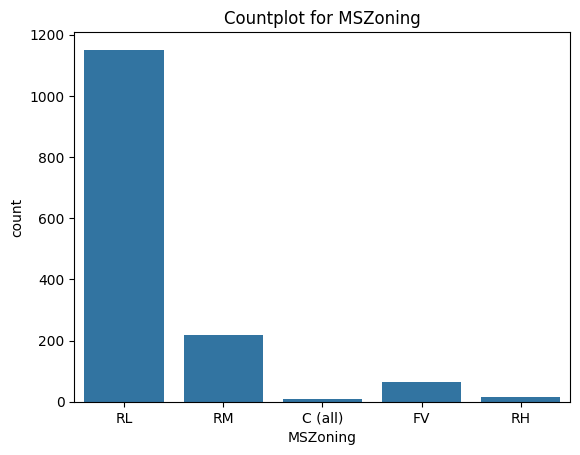

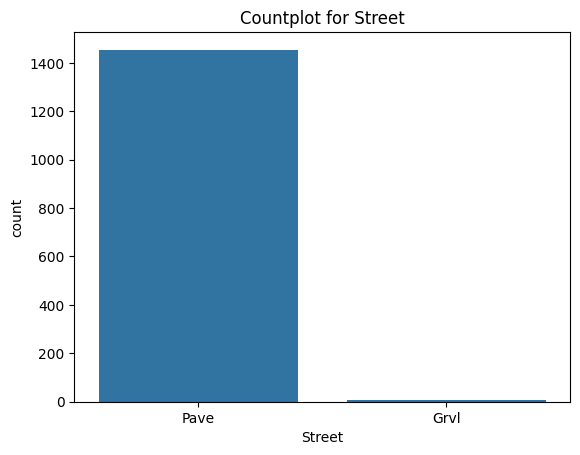

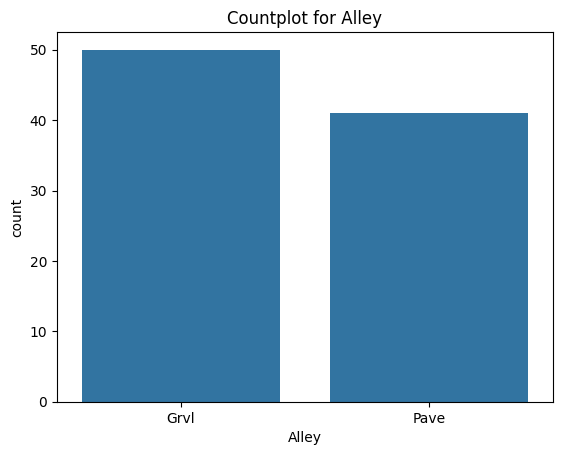

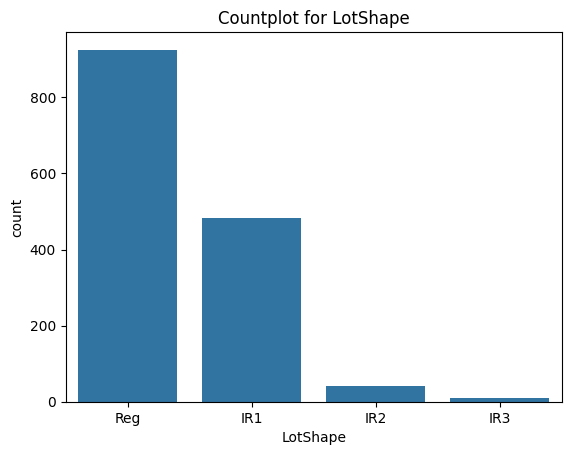

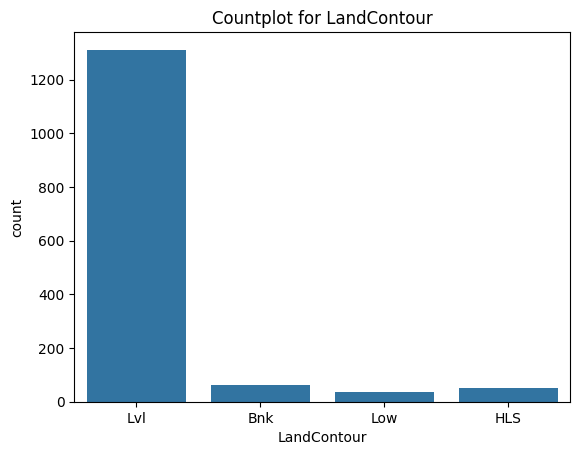

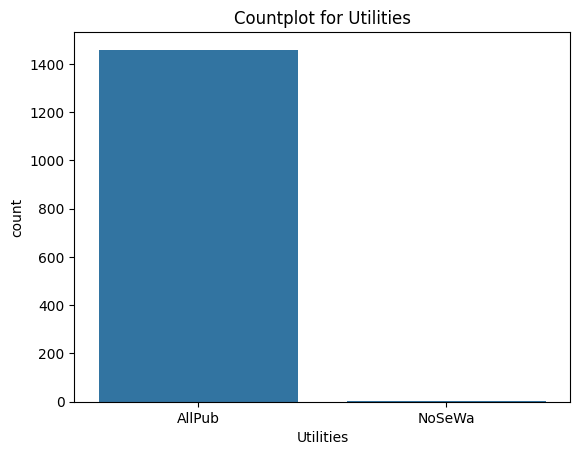

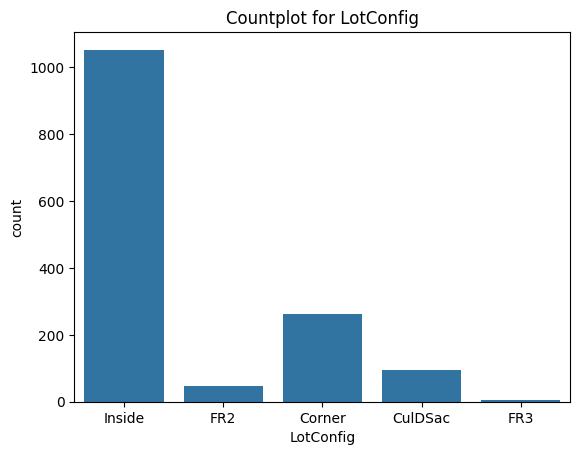

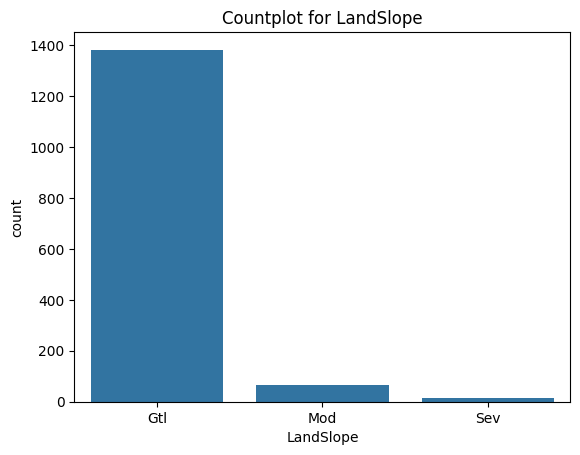

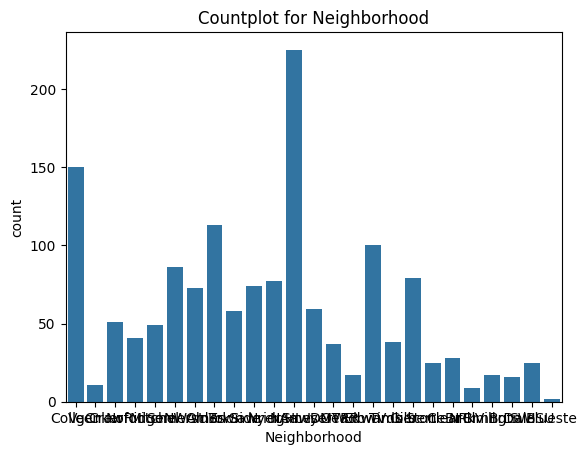

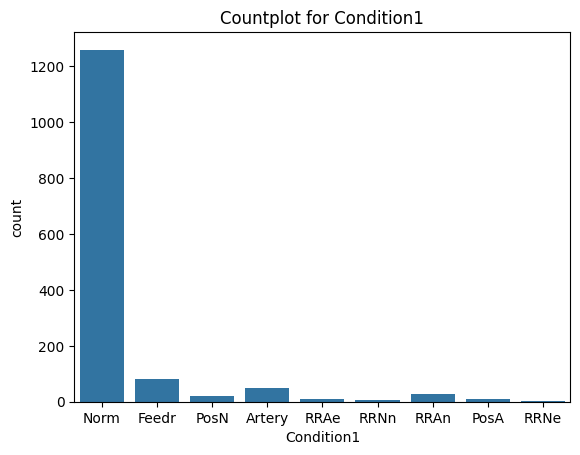

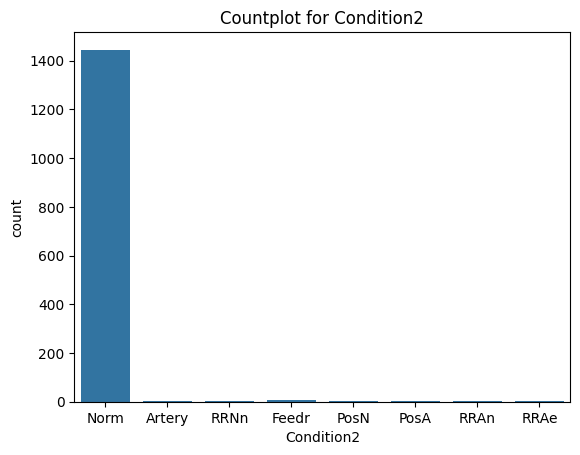

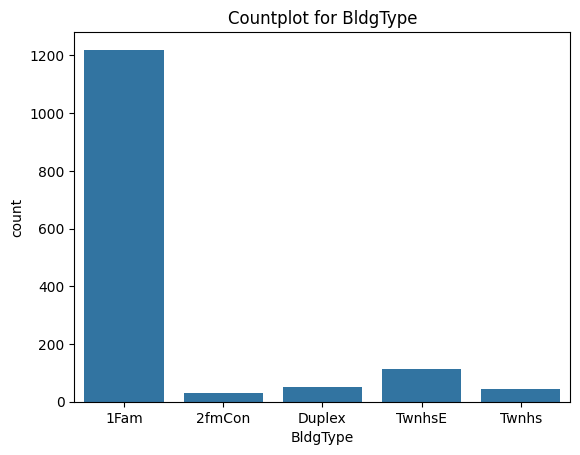

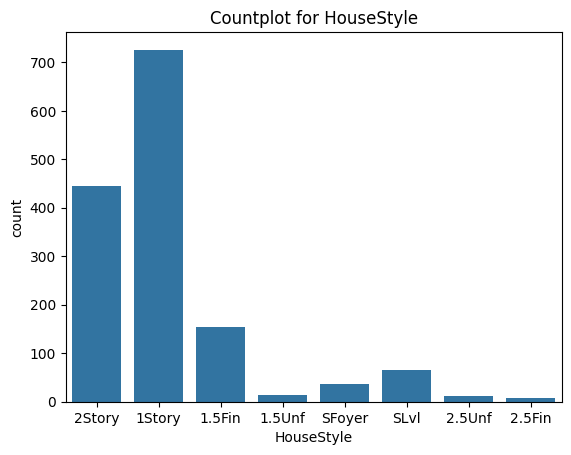

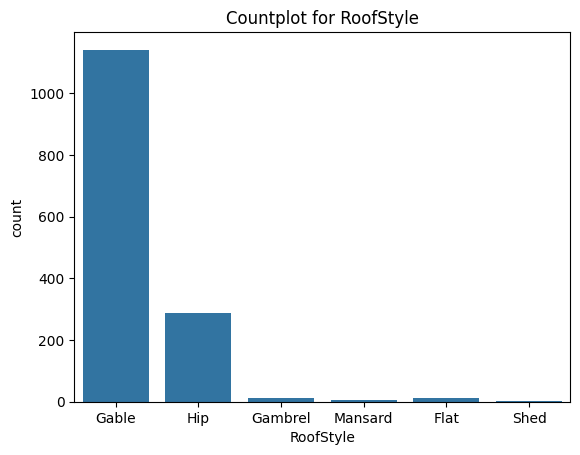

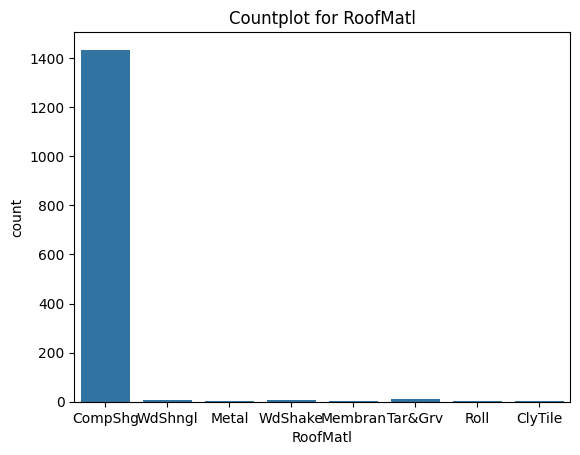

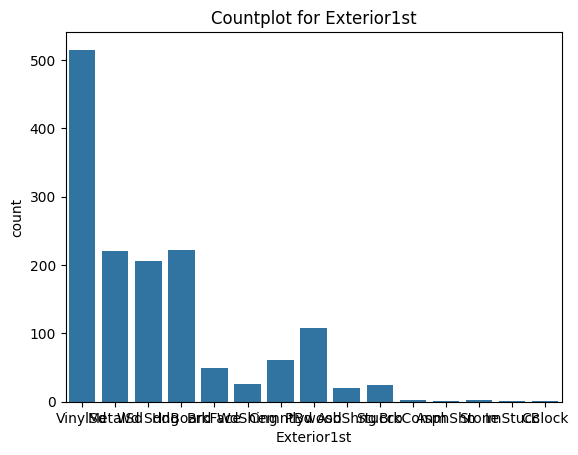

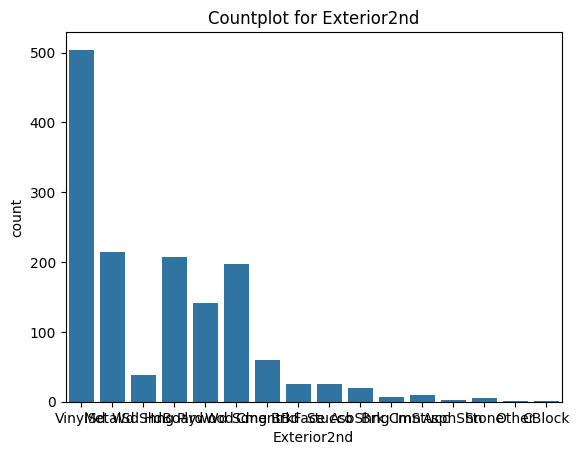

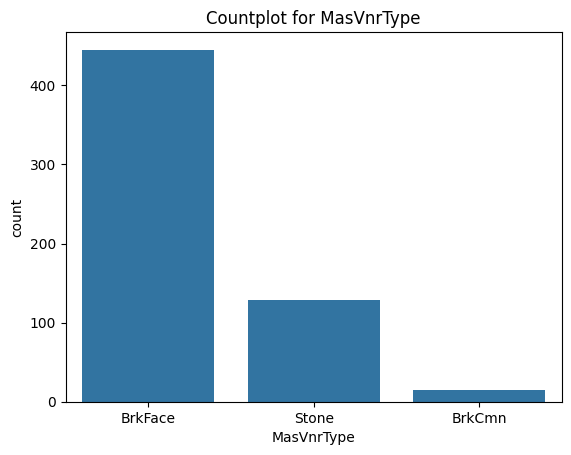

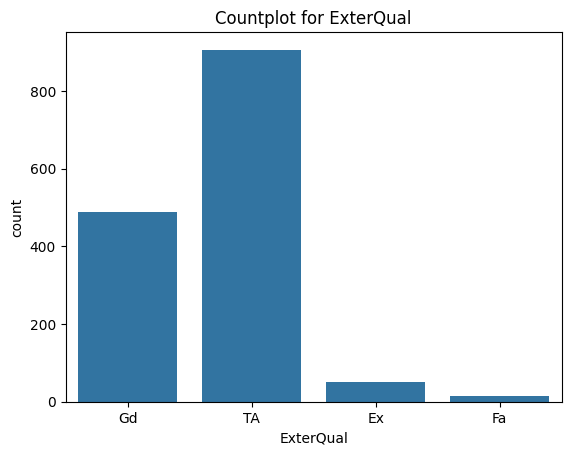

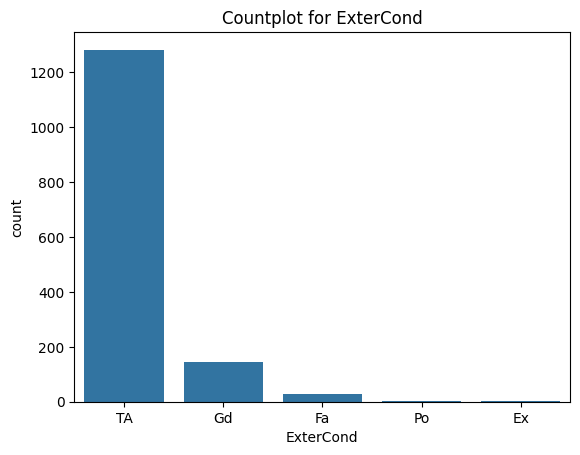

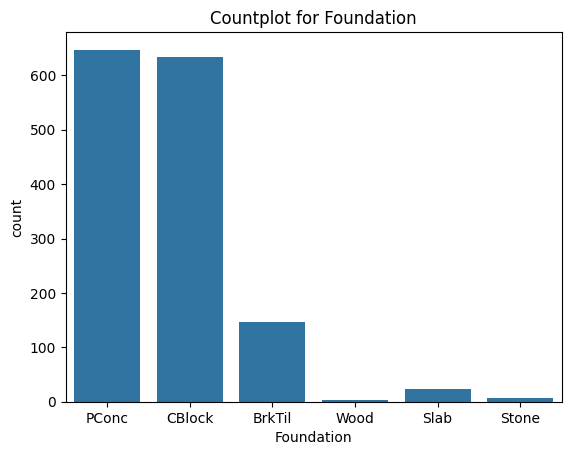

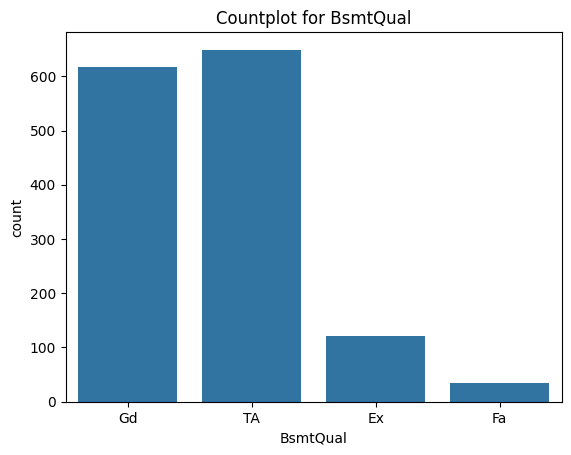

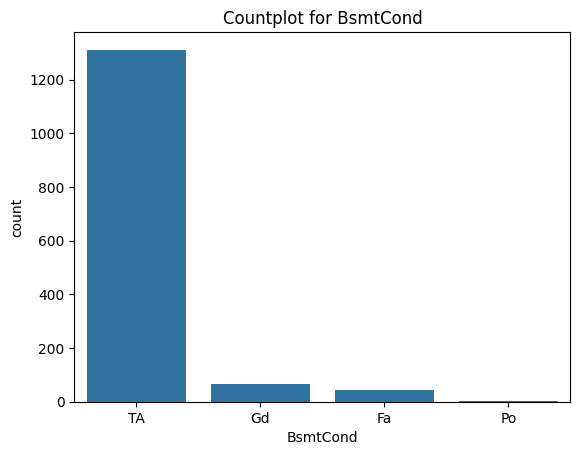

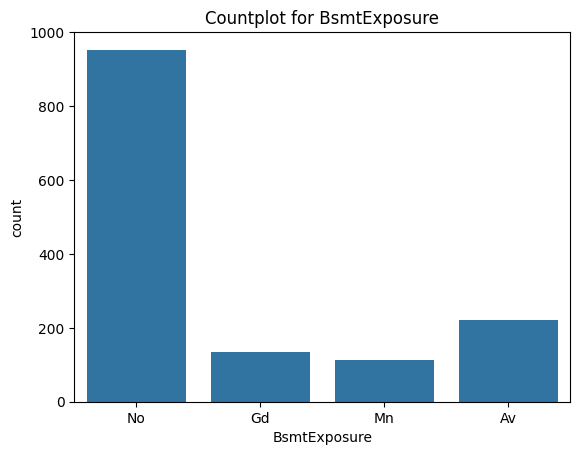

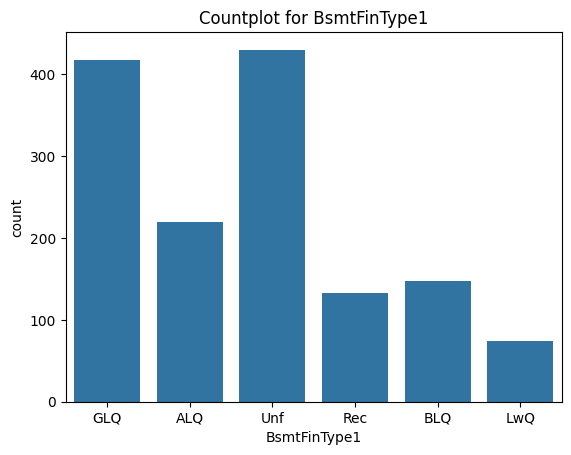

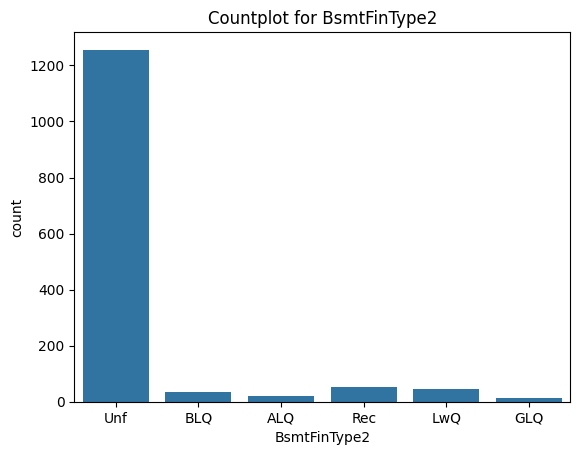

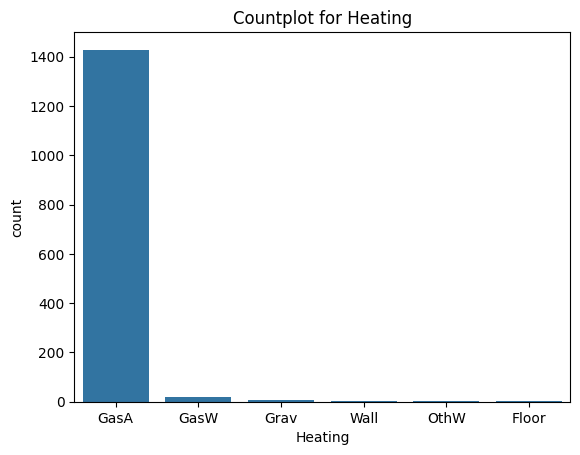

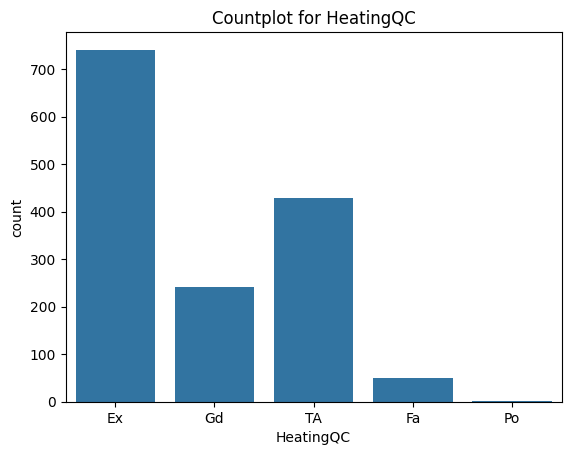

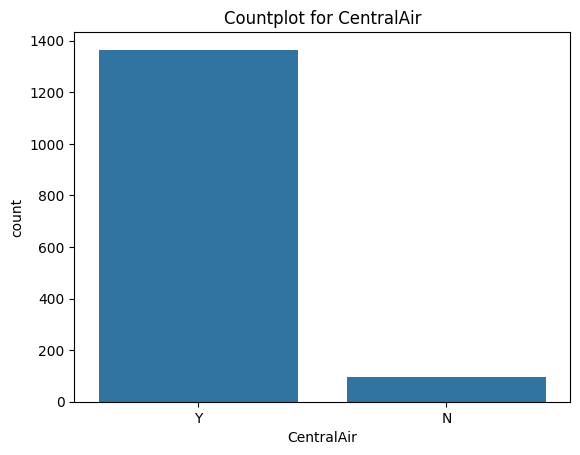

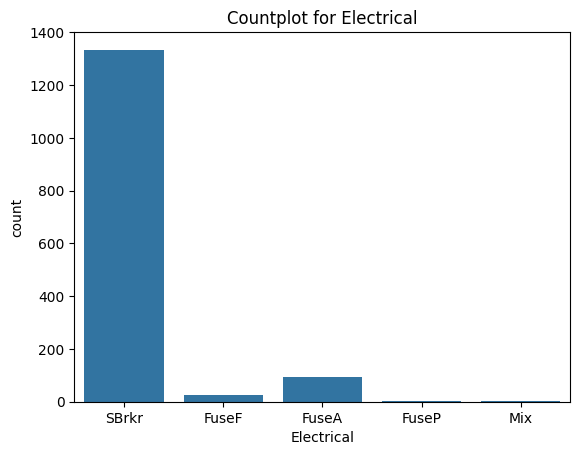

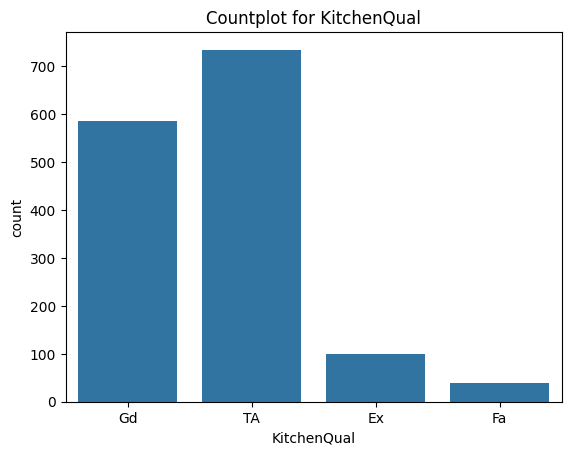

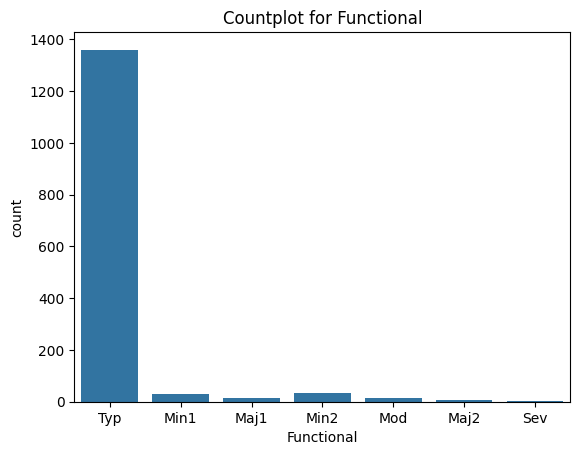

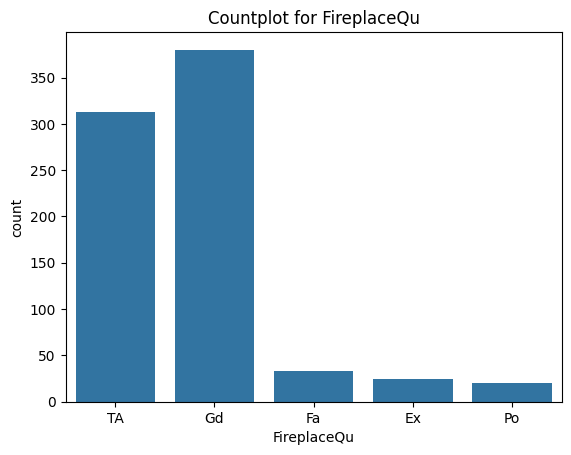

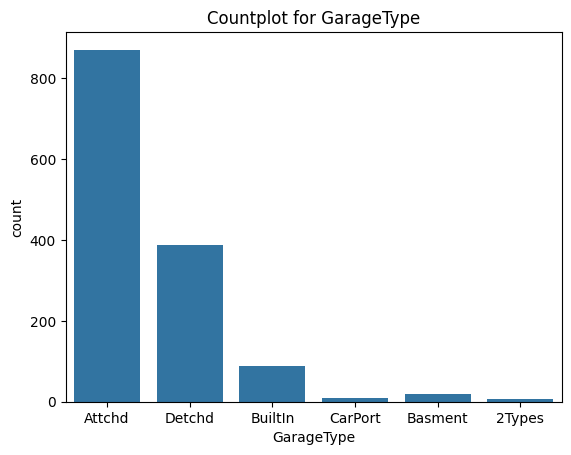

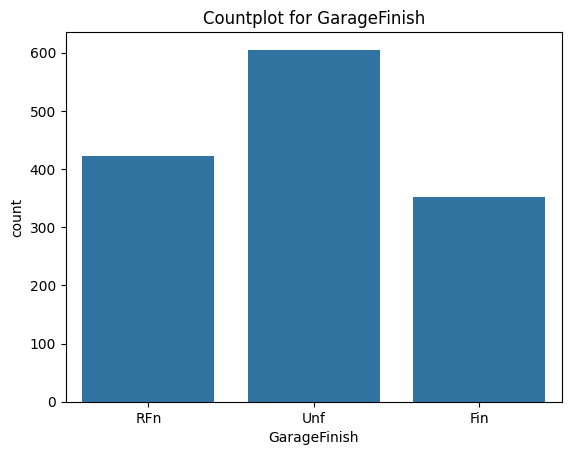

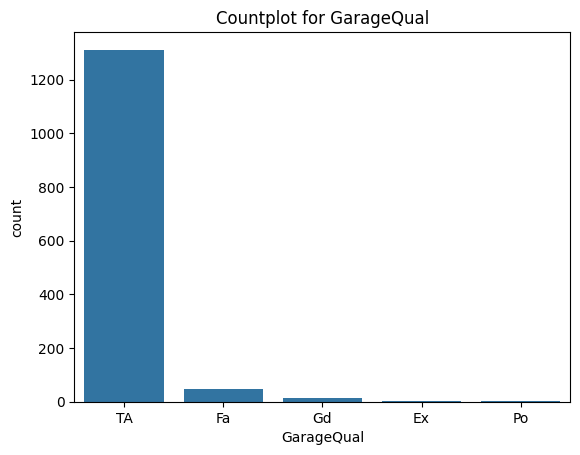

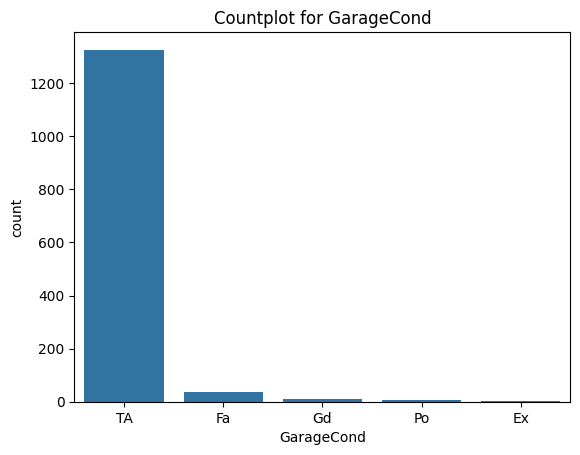

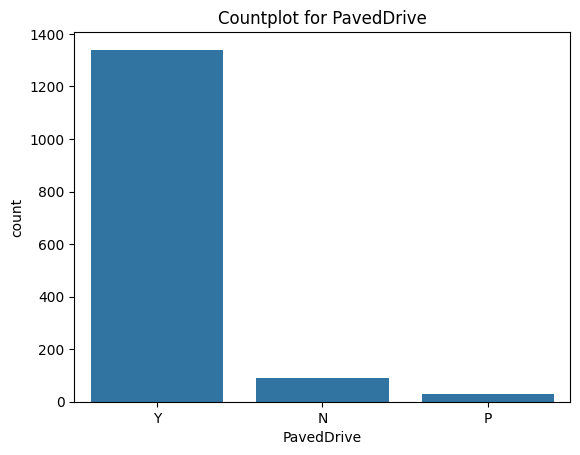

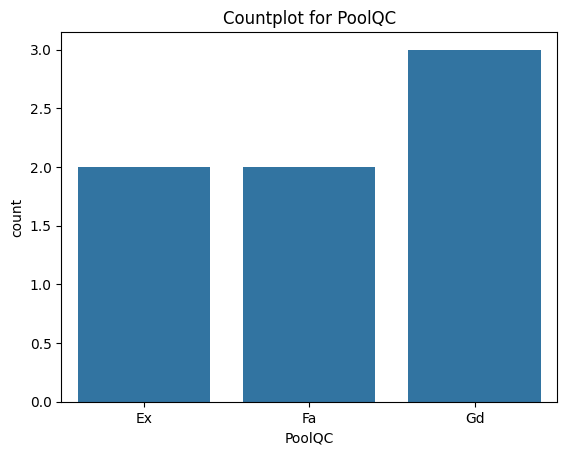

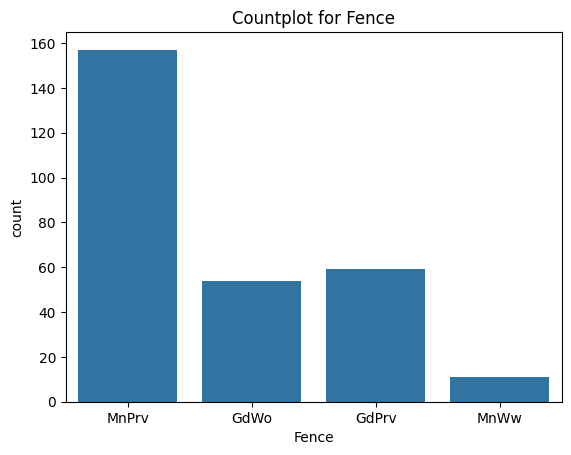

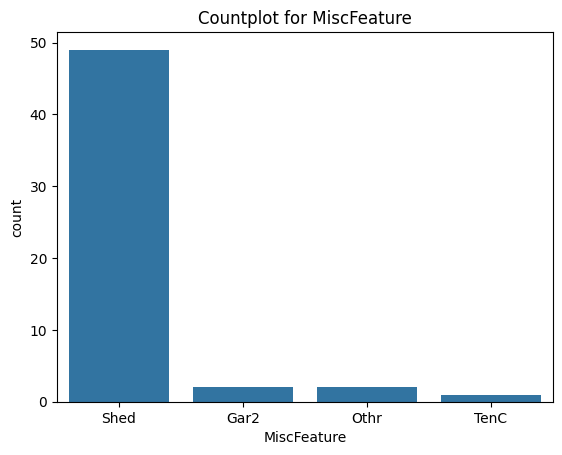

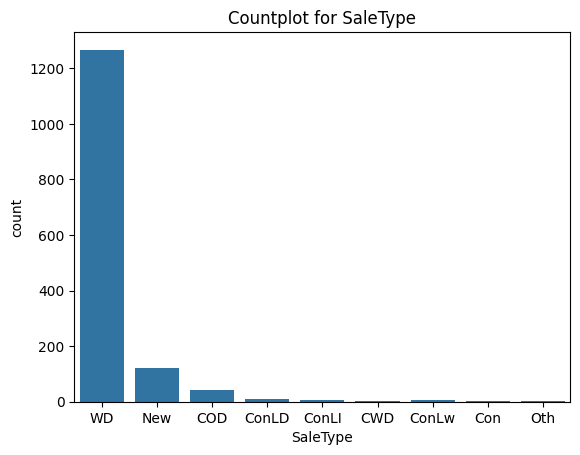

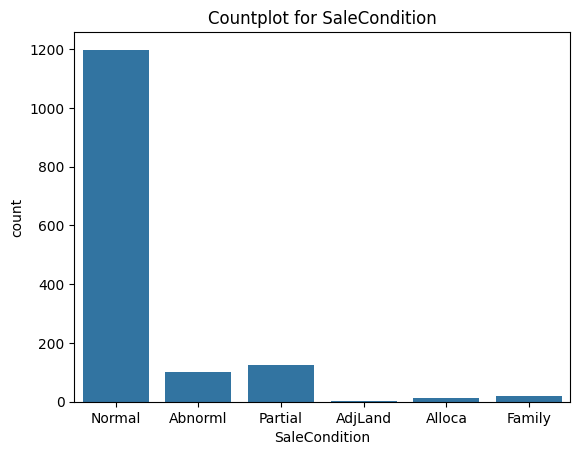

In [32]:
for i in cat:
    sns.countplot(df,x=i)
    plt.title(f'Countplot for {i}')
    plt.show()

## ===========================================================================================================

## ===========================================================================================================

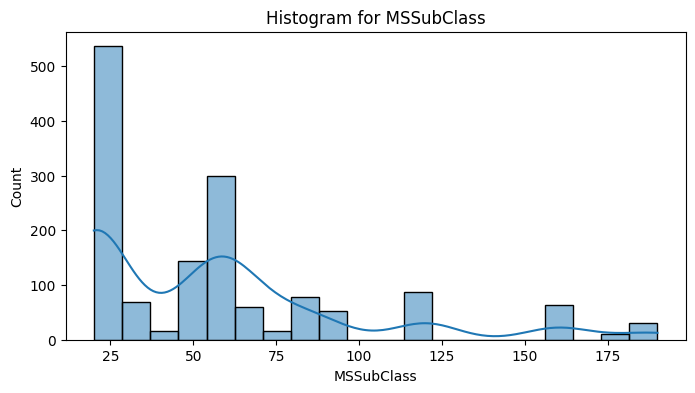

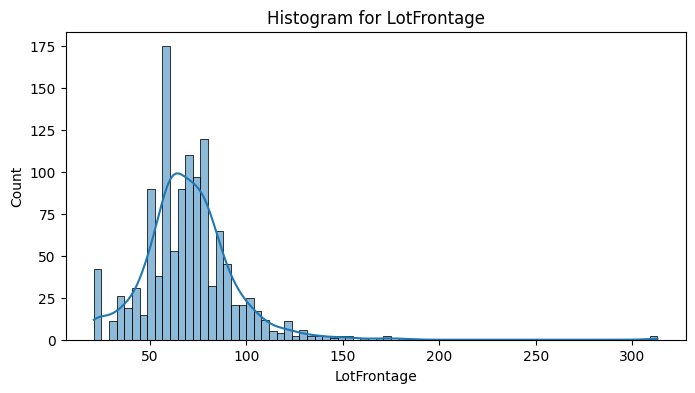

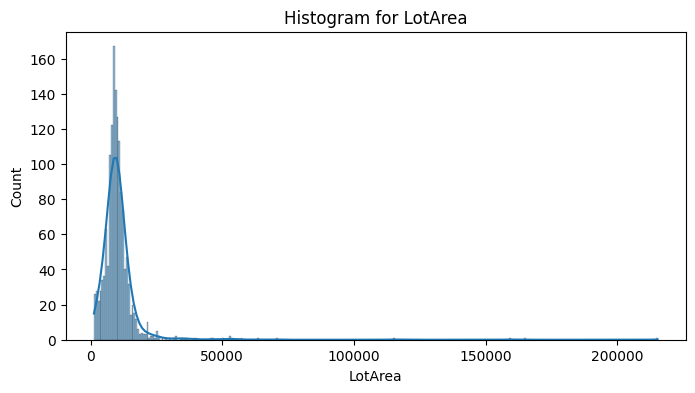

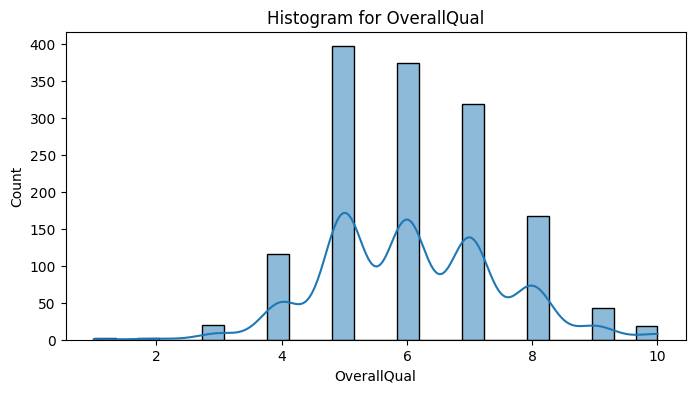

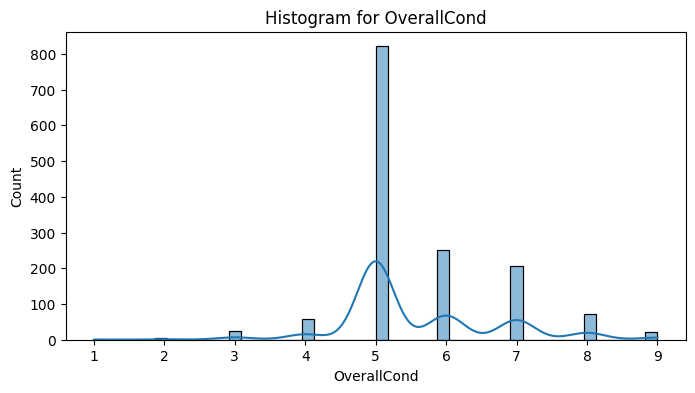

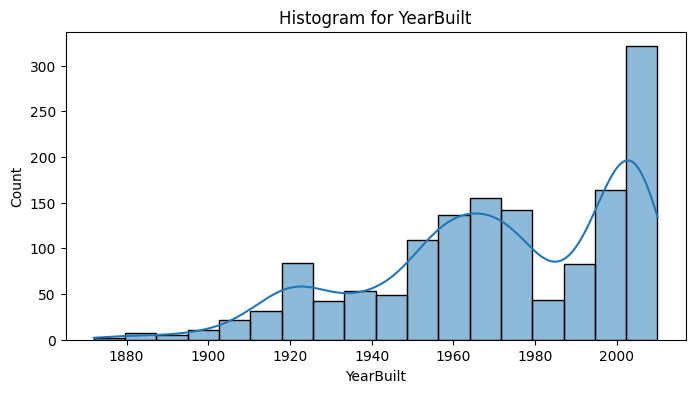

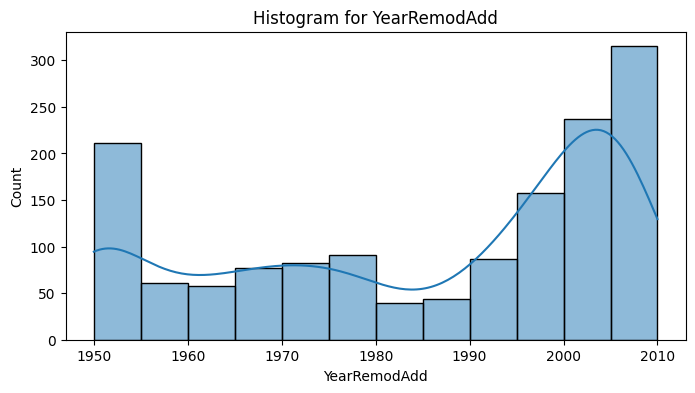

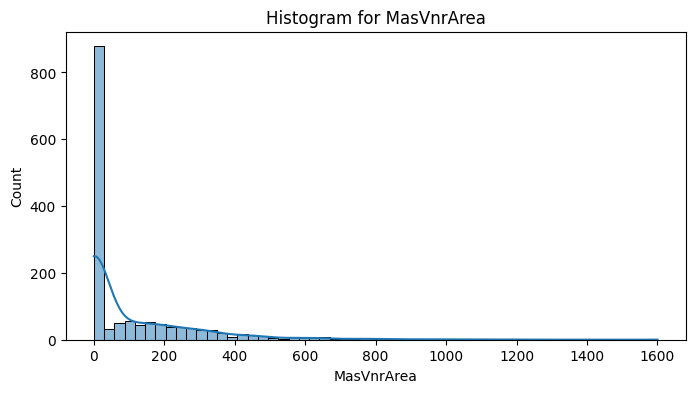

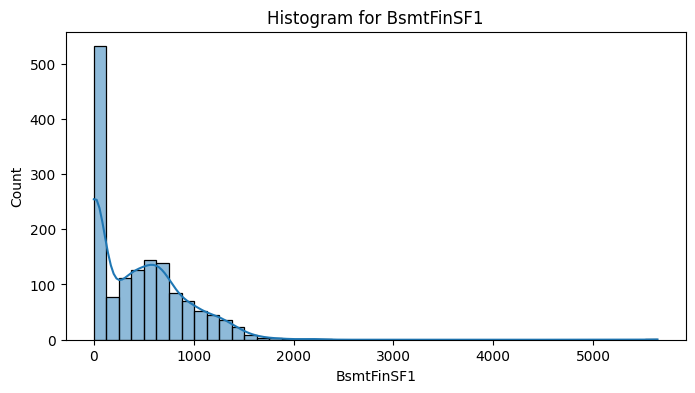

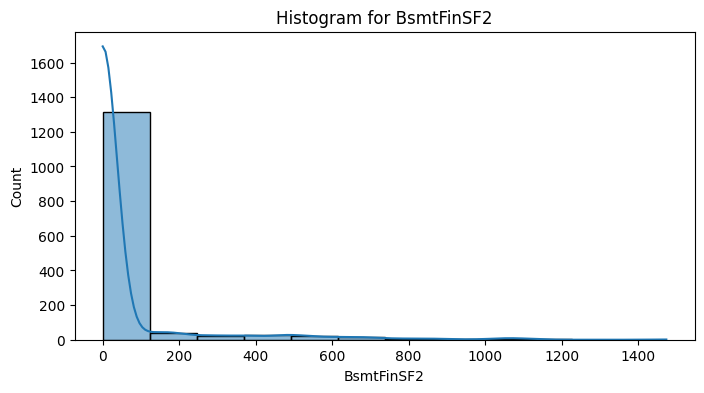

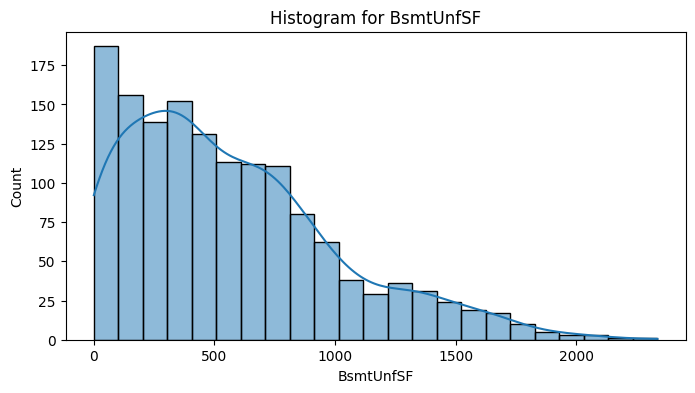

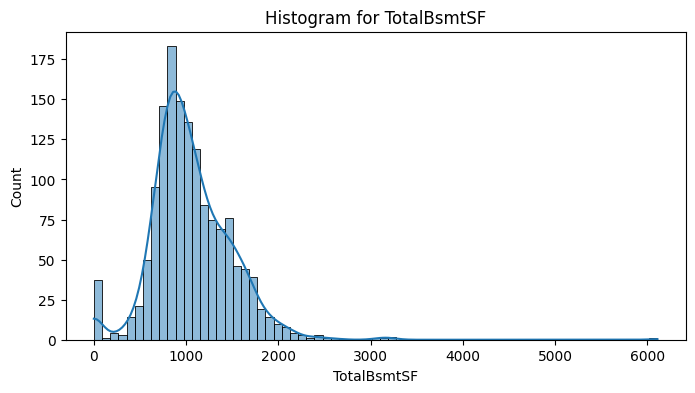

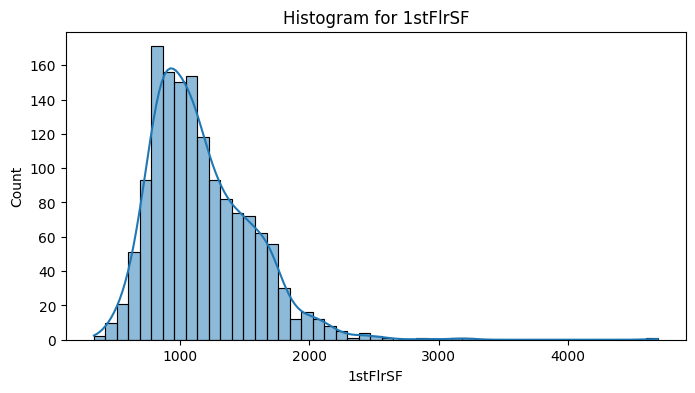

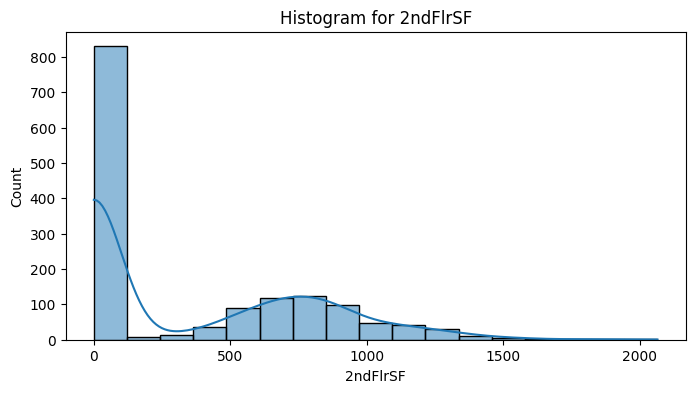

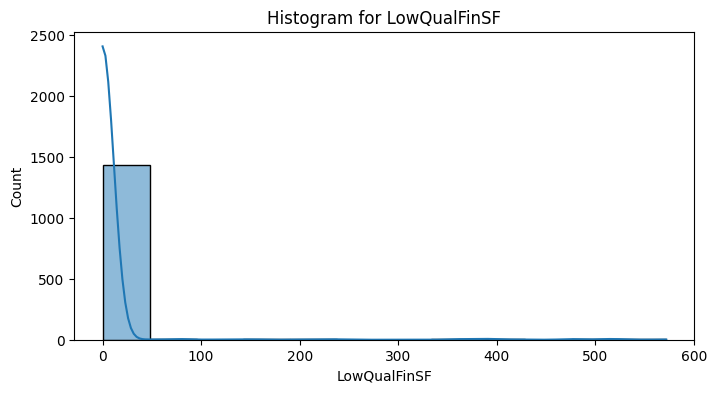

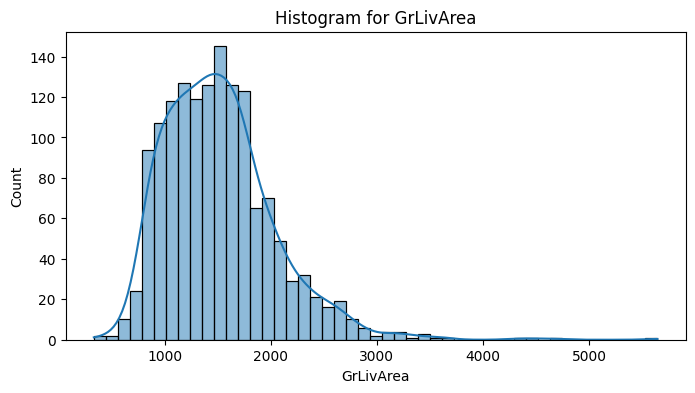

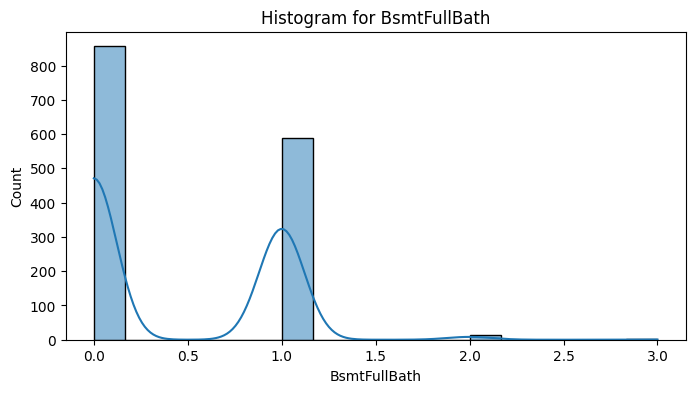

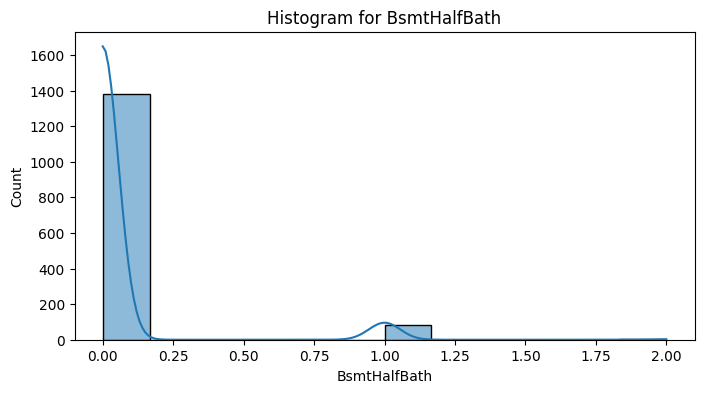

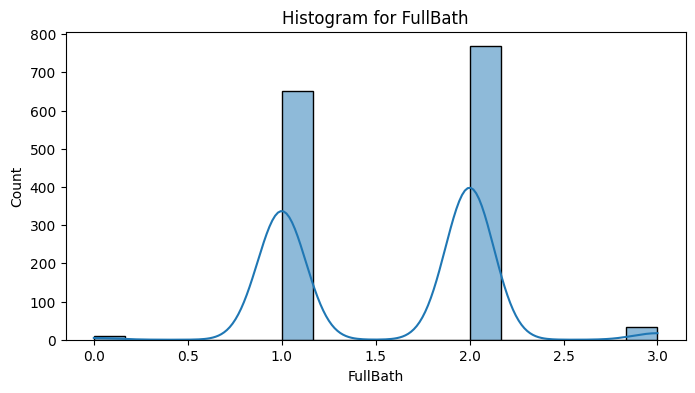

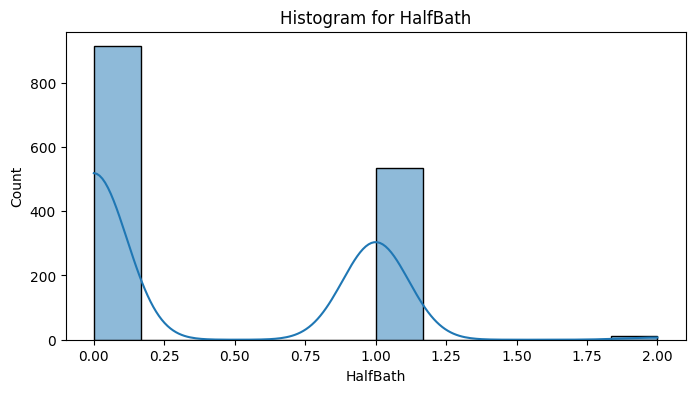

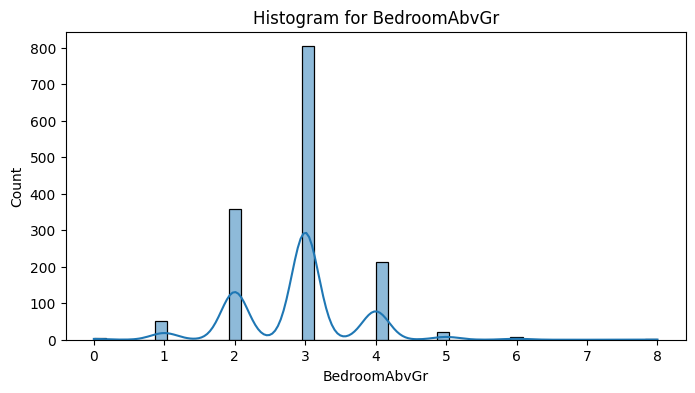

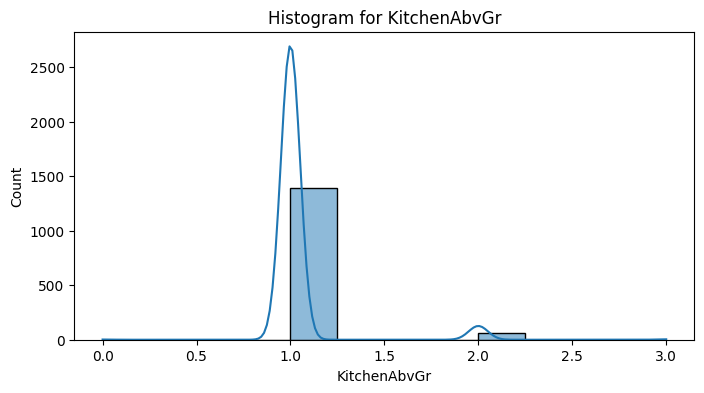

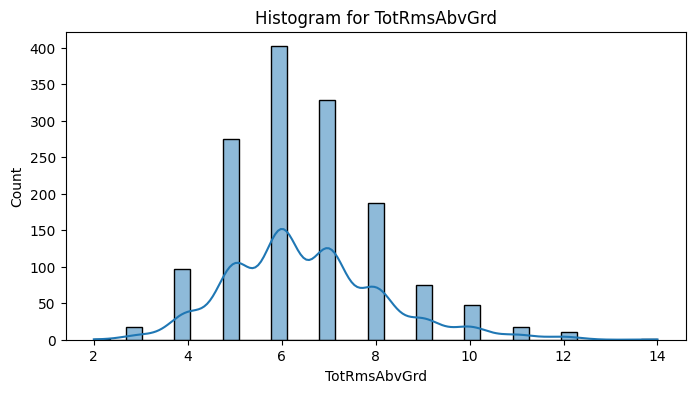

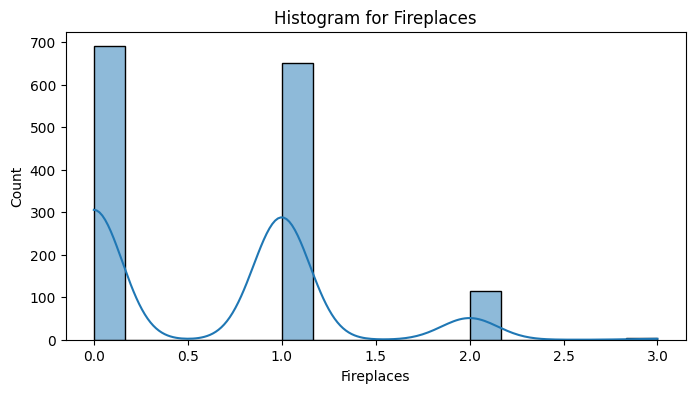

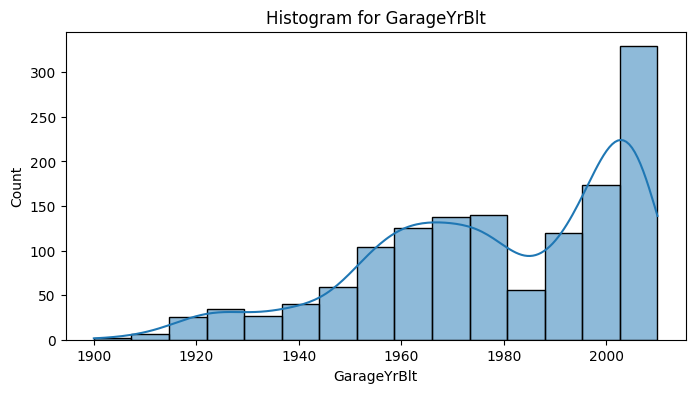

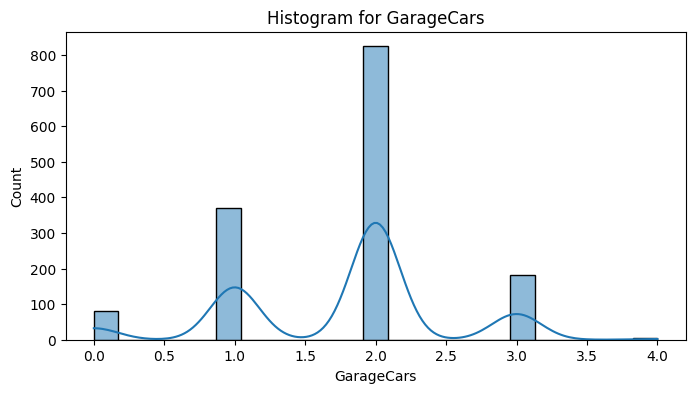

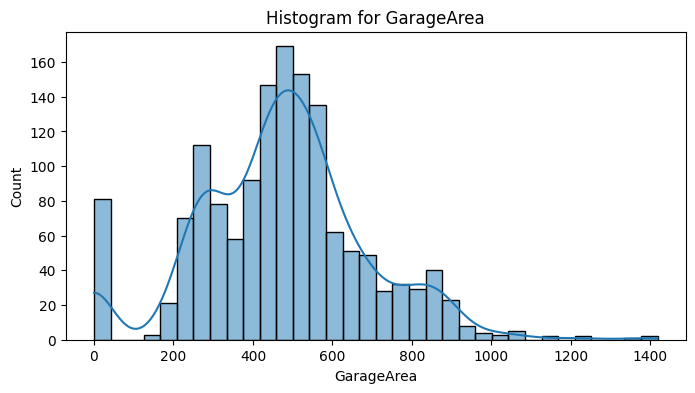

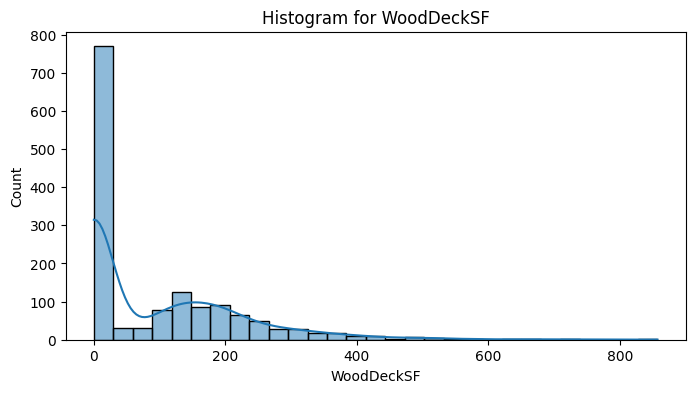

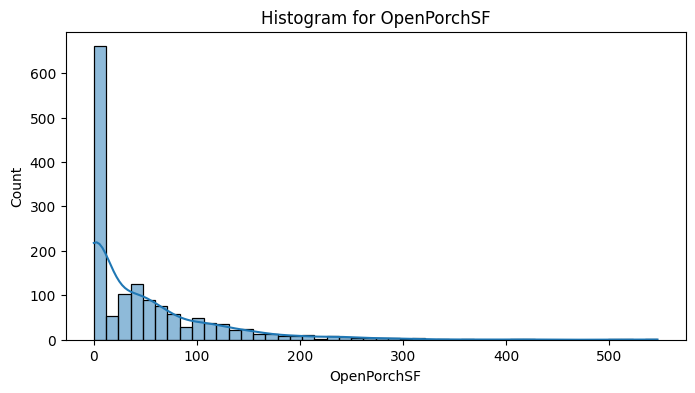

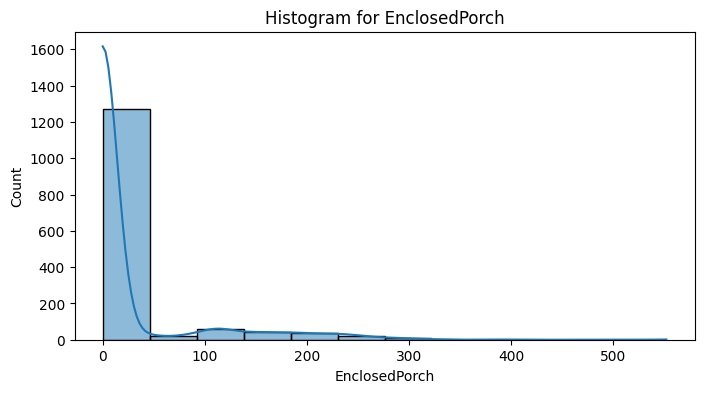

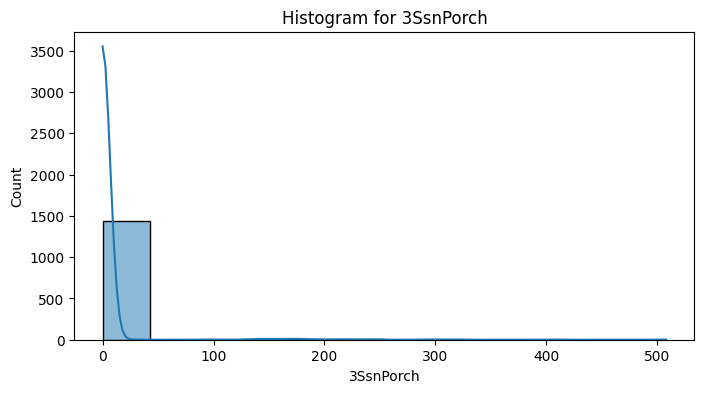

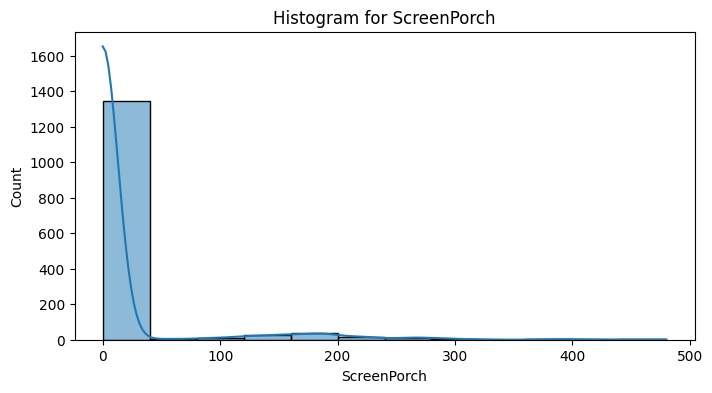

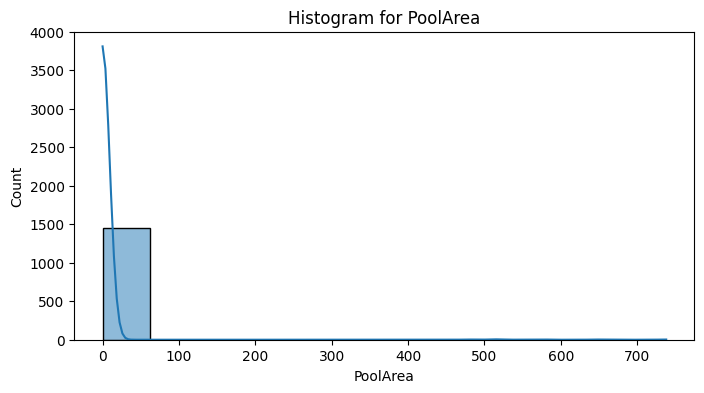

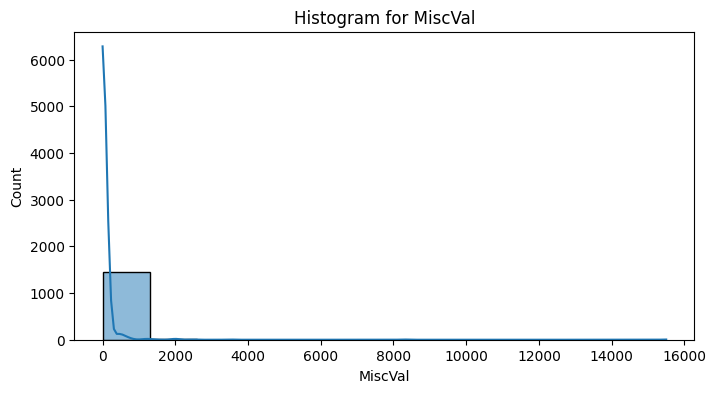

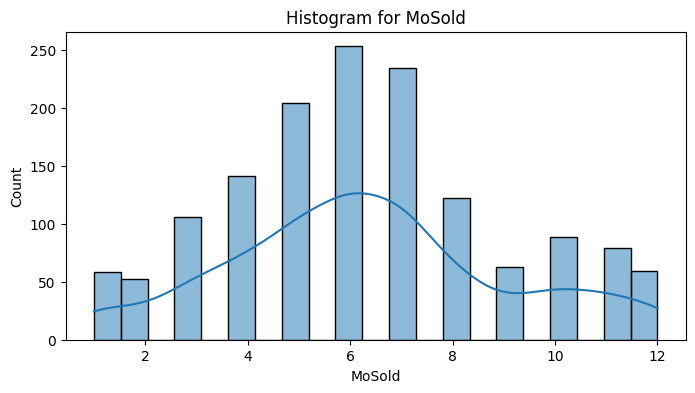

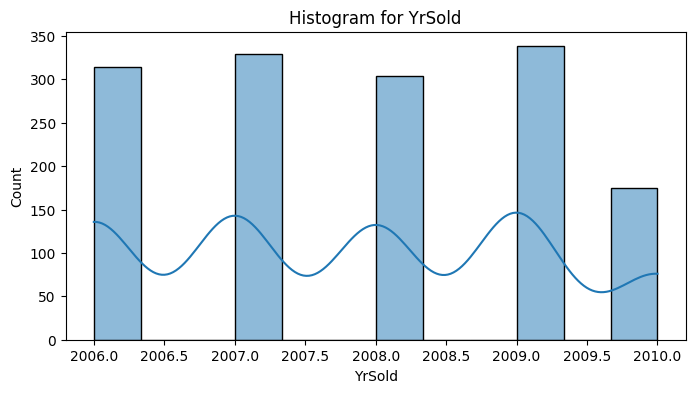

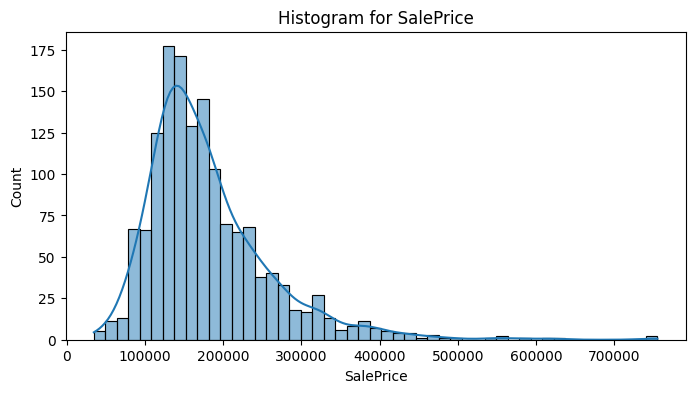

In [33]:
for i in con:
    plt.figure(figsize=(8,4))
    sns.histplot(df,x=i,kde=True)
    plt.title(f'Histogram for {i}')

### Countplot Observation:
1. 'RL' -Residential Low Density is the highest zoning classification
2. Most of the houses have 'Paved' road access from street to property
3. There is no alley access to most of the properties
4. Most of the properties have Regular shape or have slightly Irregular shapes.Very few properties have Irregular shapes
5.  Almost all the house properties are neat flat or leveled.
6.  All public Utilities (E,G,W,& S) are available for 99% houses.
7. 98% houses have normal proximity to various conditions.
8. 95% houses have 1 Family Buidling type
9. Maximum number of houses have 1 story style, followed by 2 story style and 1.5 finished story style of dwelling.
10. Exterior Quality, Basement Quality, Kitchen Quality can be expected around Typical/Average - Good
11. Exterior Condition , Basement condition of houses are Typical/ Average
12. Most of the houses are built on pconc, cblock foundation.
13. Most of the houses have  Gas forced warm air furnace heating
14. Heating quality can be expected different for diff houses which vary from Excellent to Good to Typical/Average
15. Maximum  houses provide Central AC.
16. Most of the houses have Standard Circuit Breakers & Romex Electrical system
17. Home functional can be observed as Typical
18. Garage Quality and Condition can be observed as Typical/Average
19. Most of the houses dont provide Pool access, fence access and any miscellaneous features
20. Sale type for maxmimum houses is Warranty Deed - Conventional and Sale condition is normal.

### Histogram Observations:
1. Streets connected to property have around 50-100 linear feet, 
and very few have 100-300 linear feet
2. overall quality is around 5-7 and condition is around 5 on a scale of 10
3. Most of the houses are built around 2000 and few others are built around 1950-1980
4. Most of the hosues are remodeled in year 1950, 2000-2010 
5. Basement unfinished area for the houses is around 0-1000
6. Total basement area is around 800-1200 
7. Above ground living area is around 1000-2000
8. Most of the houses dont provide full/half bathrooms in basement, few of them provide 1 full bathroom
9. Most of the houses provide 1 or 2 full bathrooms and few of them provide 1 half bathroom
10. Total rooms above grade are around 5-7
11. Houses are more likely sold during April -July month period.
12. Most of the houses are sold at a SalePrice of 1L to 2L. There are very few houses which are sold at a higher price ranging from 4L to 7L

## Bivariate Analysis

In [34]:
con[:10]

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2']

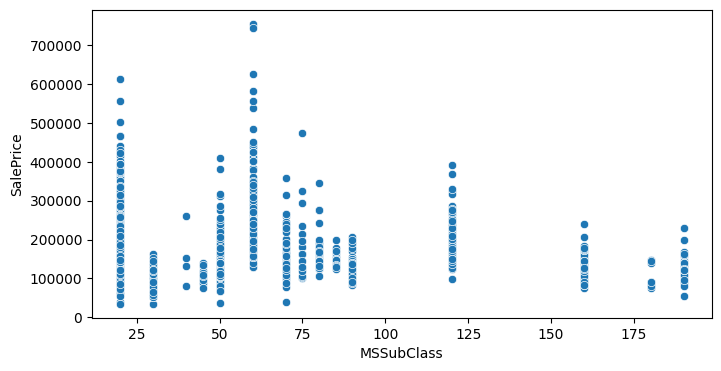

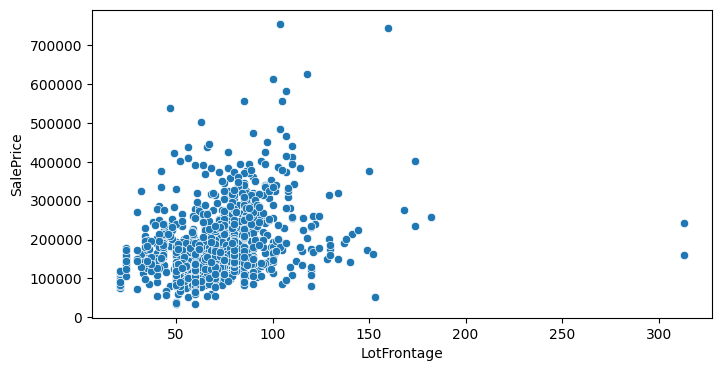

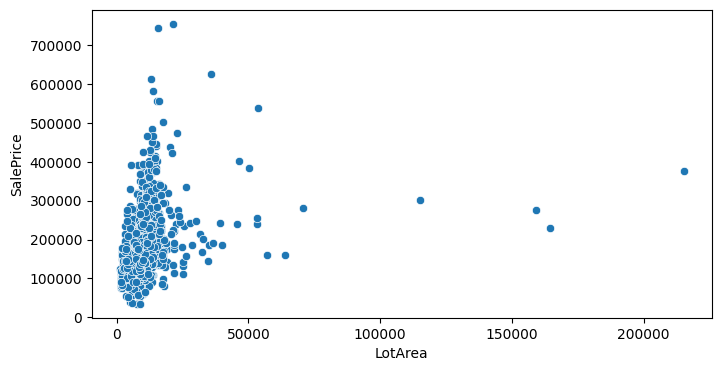

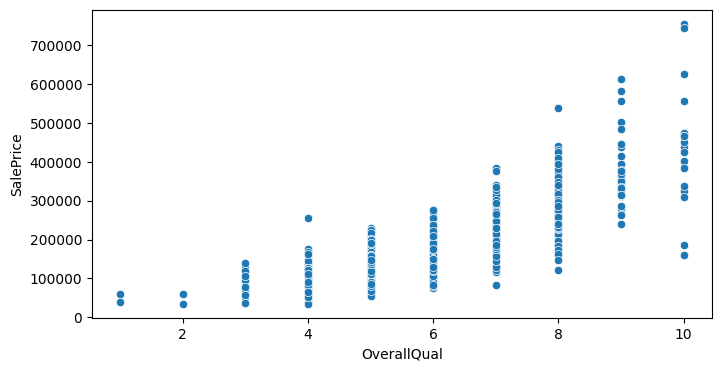

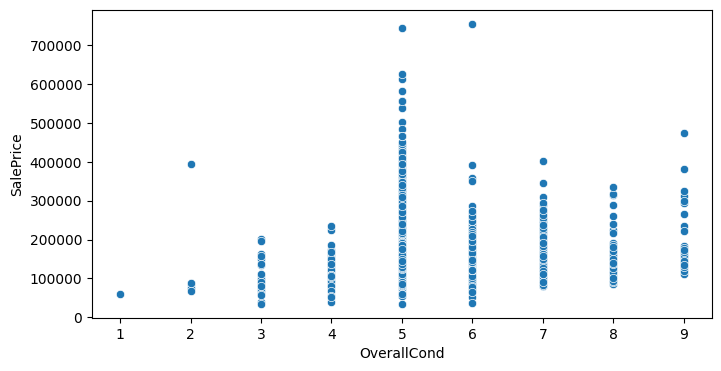

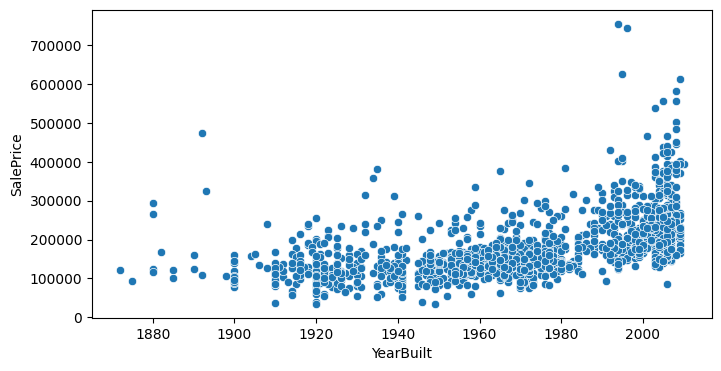

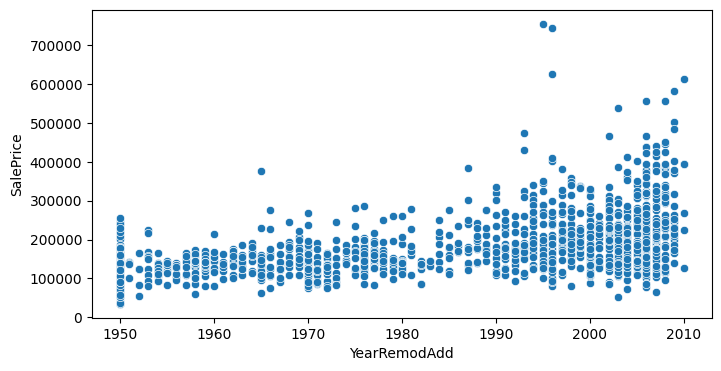

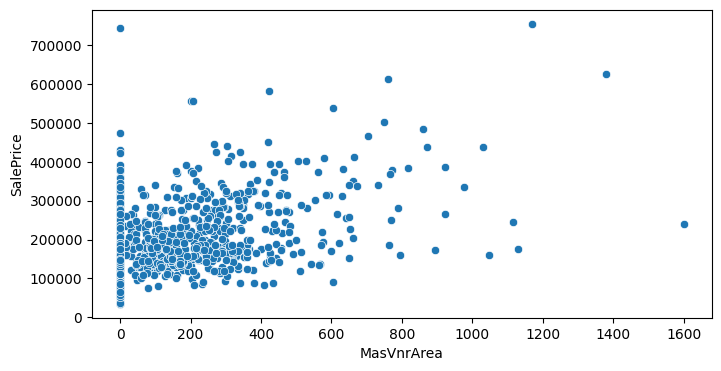

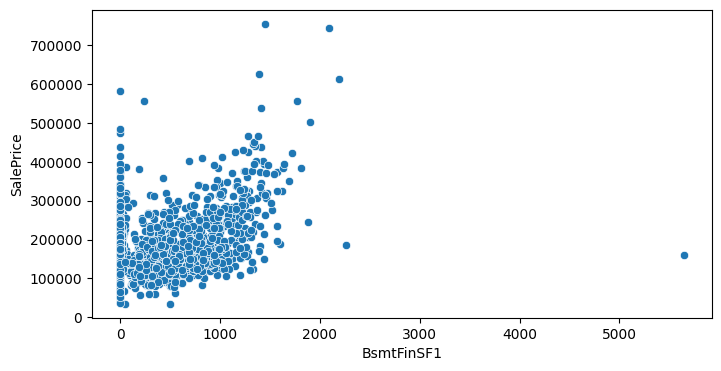

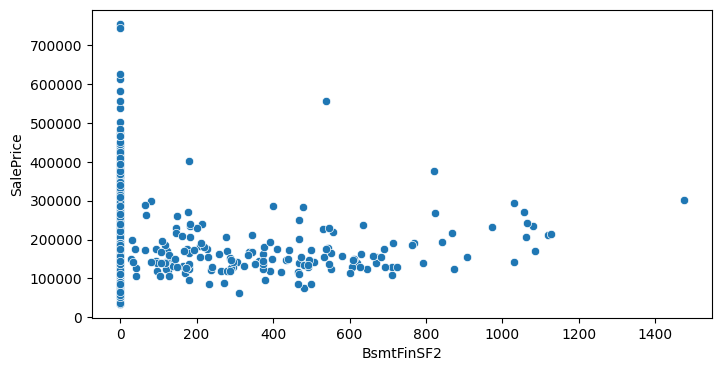

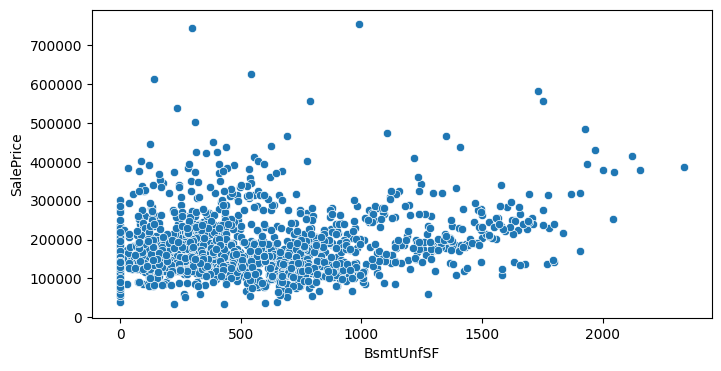

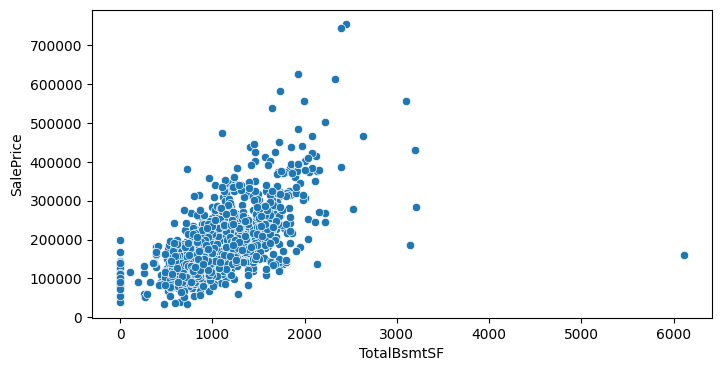

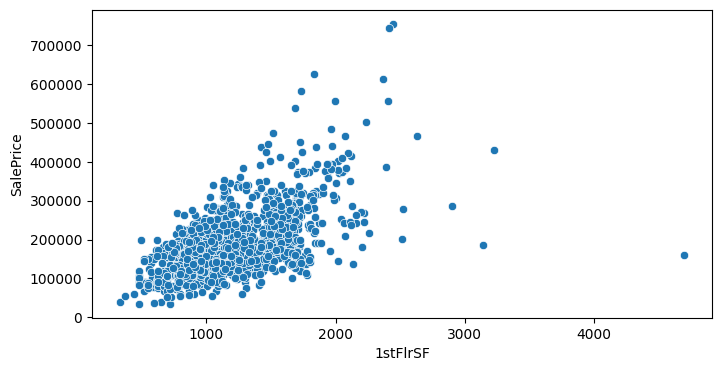

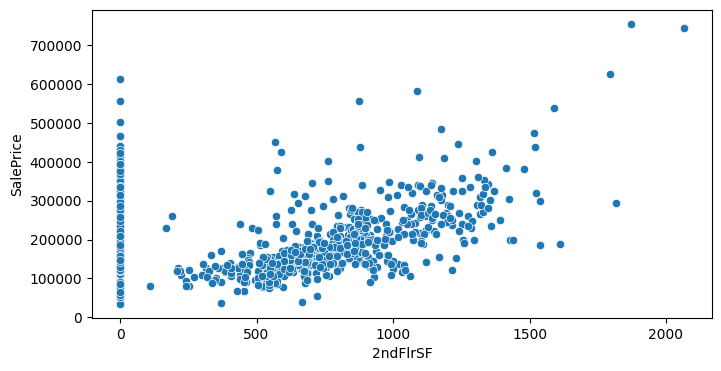

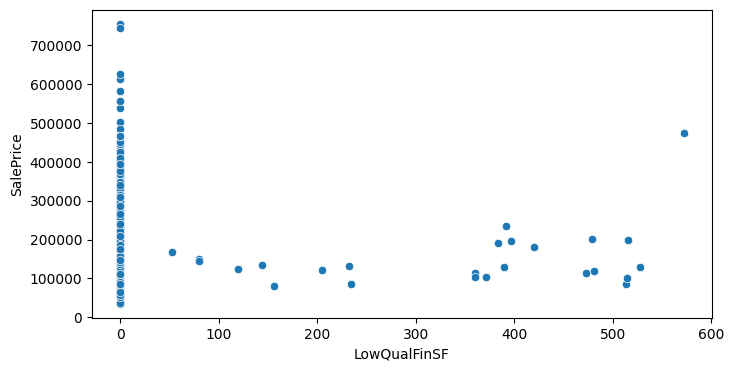

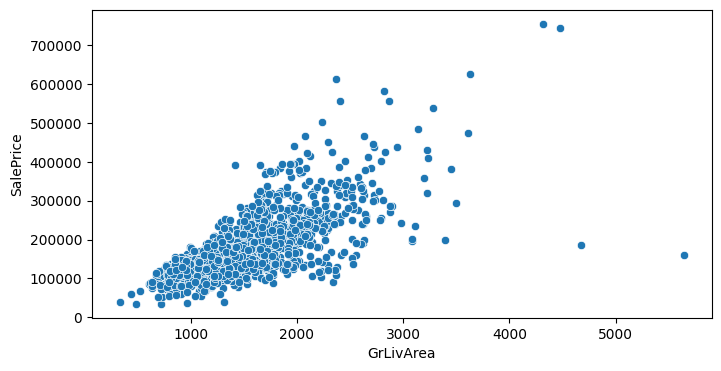

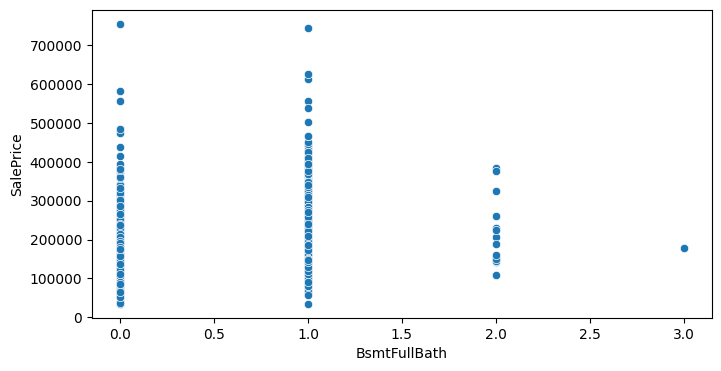

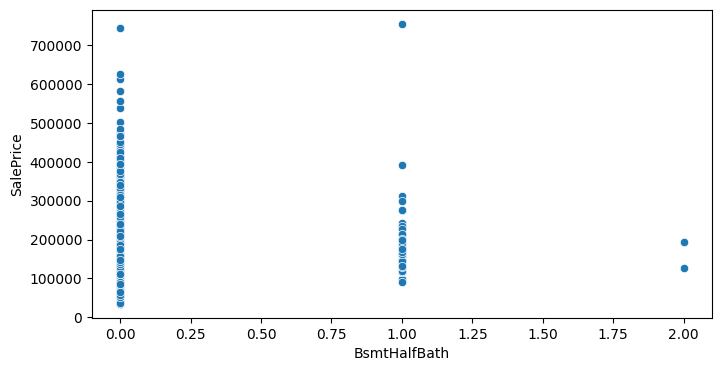

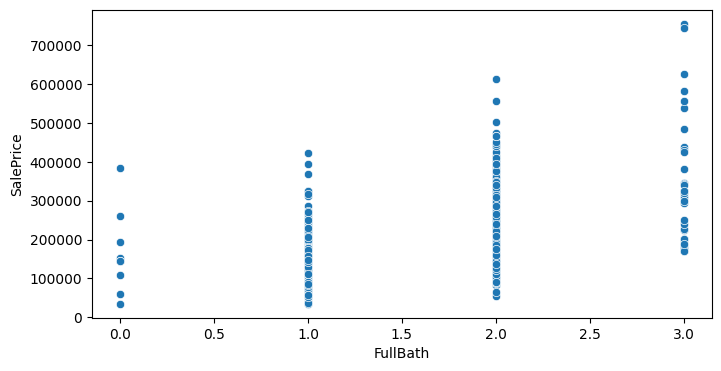

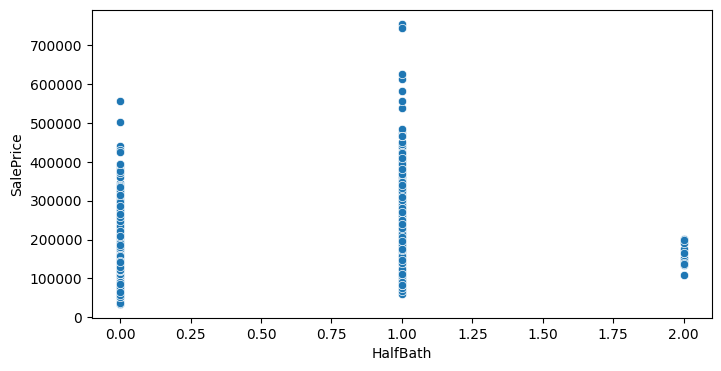

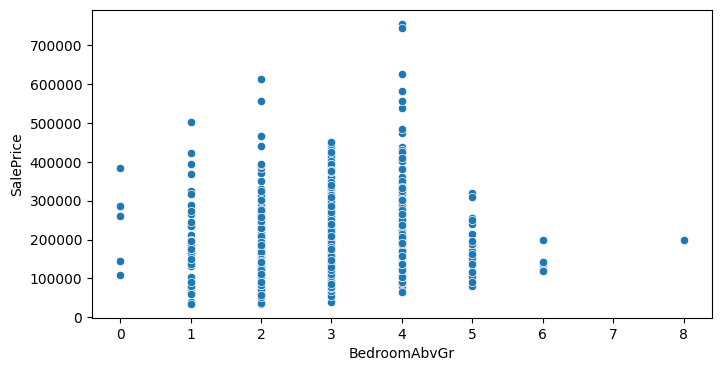

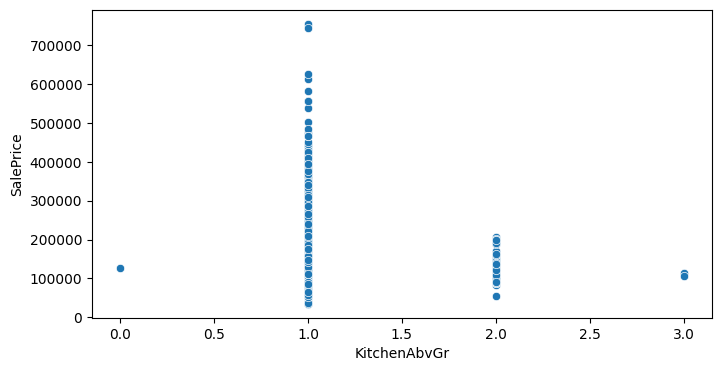

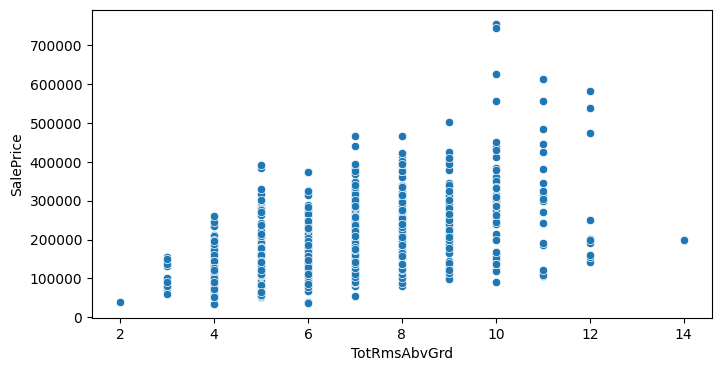

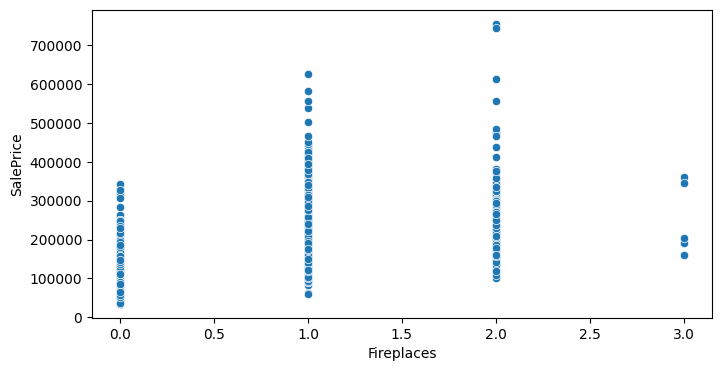

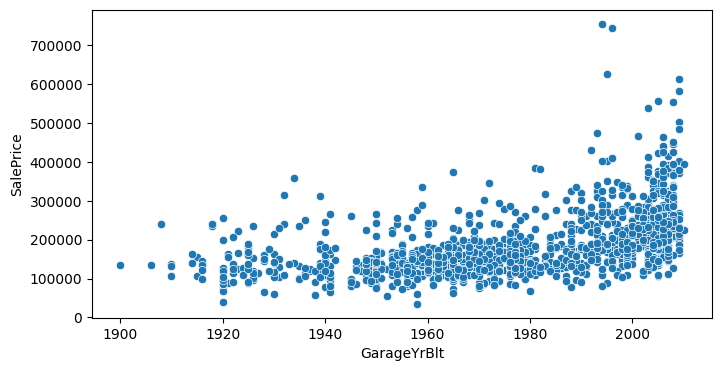

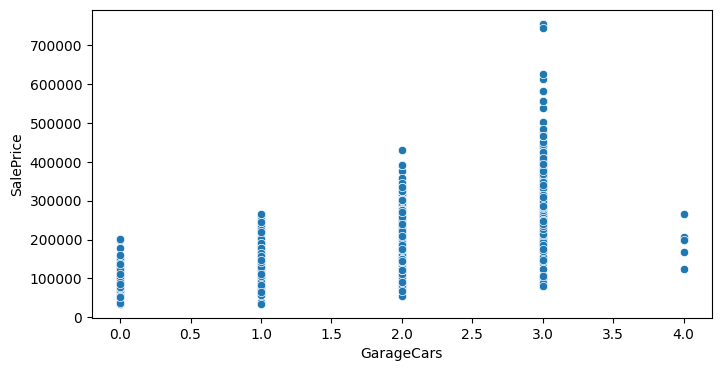

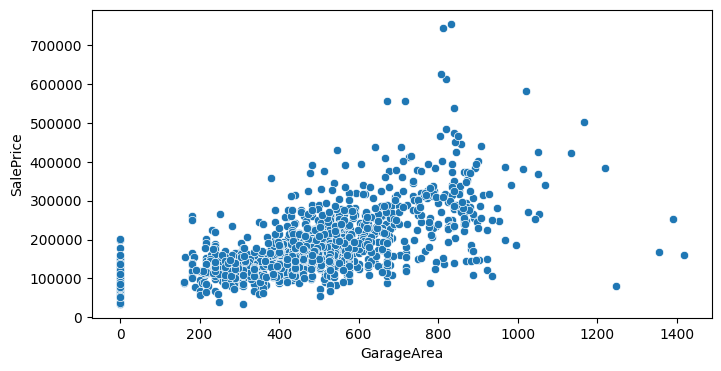

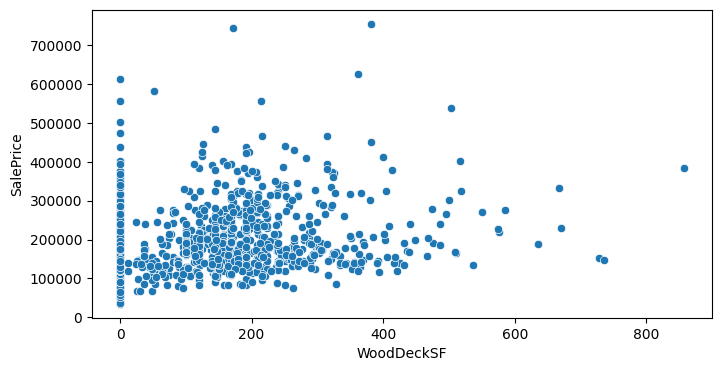

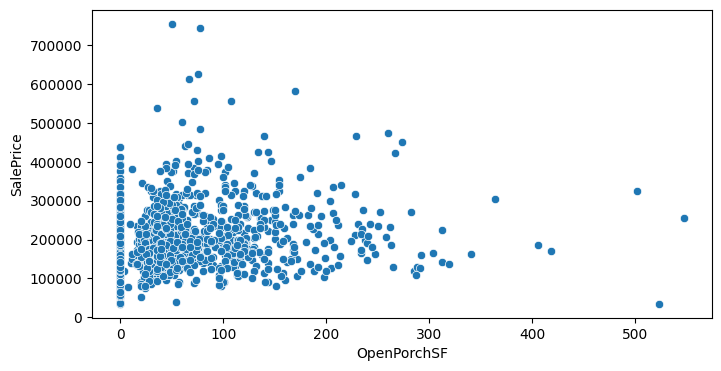

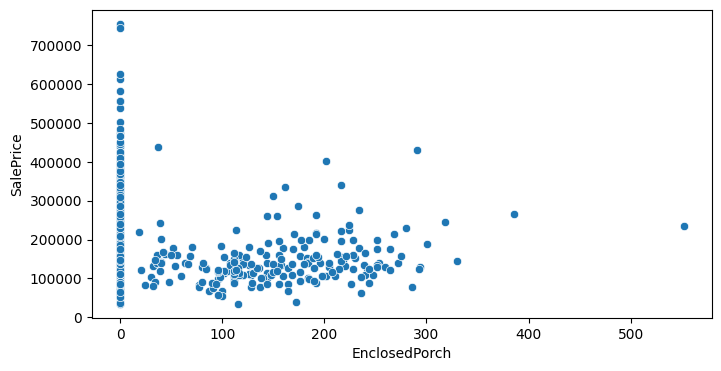

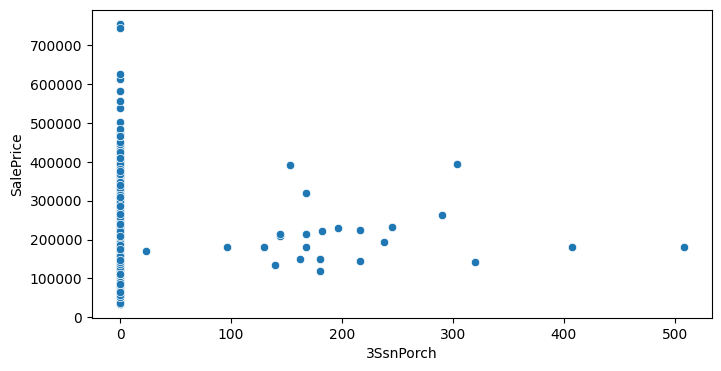

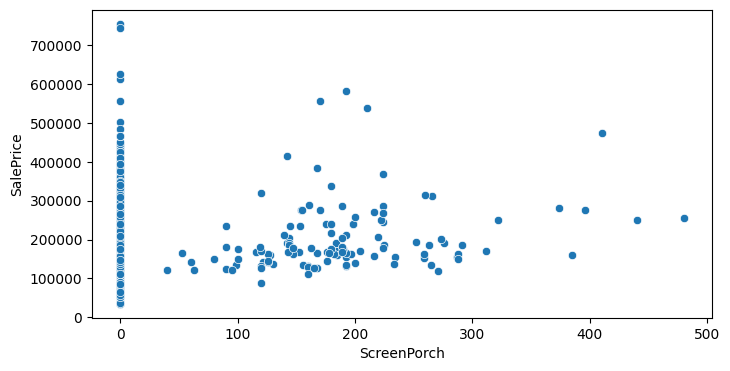

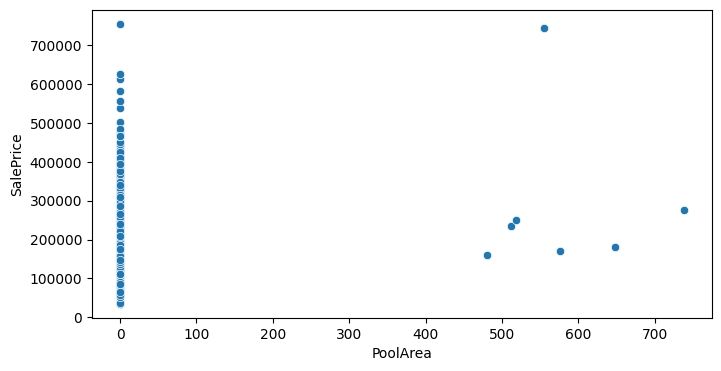

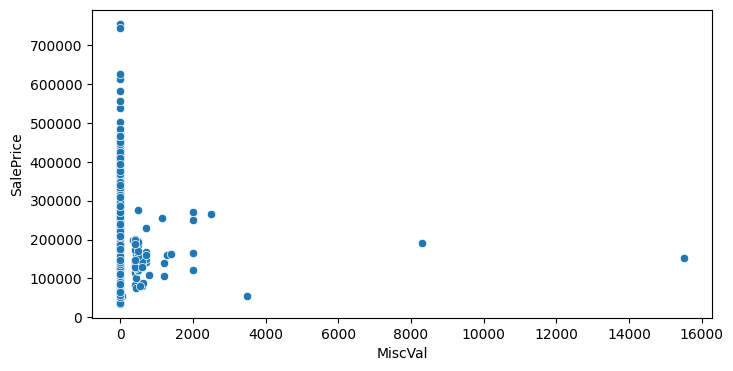

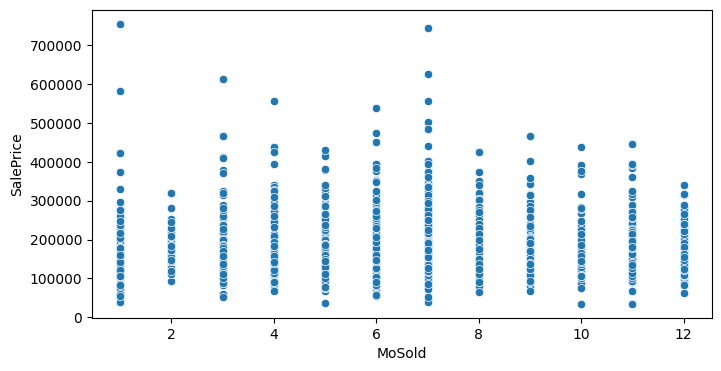

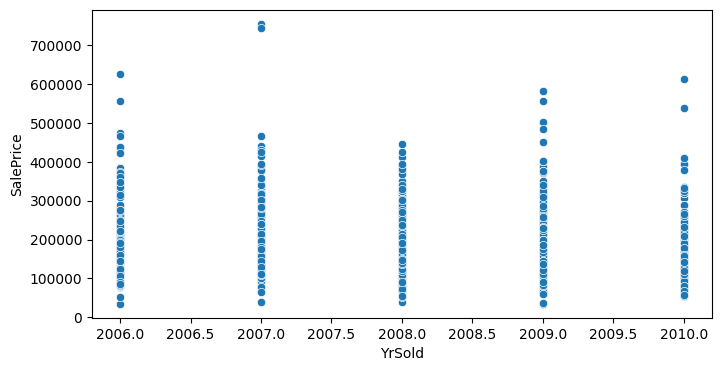

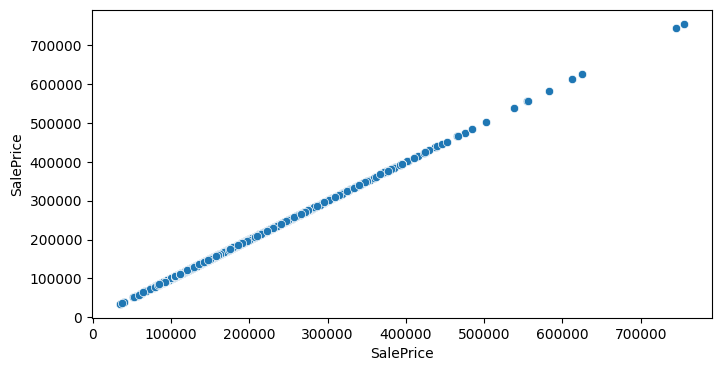

In [35]:
for i in con:
    plt.figure(figsize=(8,4))
    sns.scatterplot(df,x=i,y='SalePrice')
    plt.show()

### Scatter Plot observataions:

SalePrice increases as :
1. Overallqual of house increases
2. Basement area increases from 1000-2000
3. Number of full bathrooms increases
4. Total rooms above Ground from increases 2-10.

SalePrice is high : 
1. for houses whose overall condition of house is 5/10
2. for houses with no pool area or miscval
3. during 1st month,7th month of the year. Rest of the months have recorded saleprice from 1L-4L
4. during years 2006,2007. Rest of the years have recorded saleprice from 1L-4L

## =================================================================================================

## =================================================================================================

<Axes: >

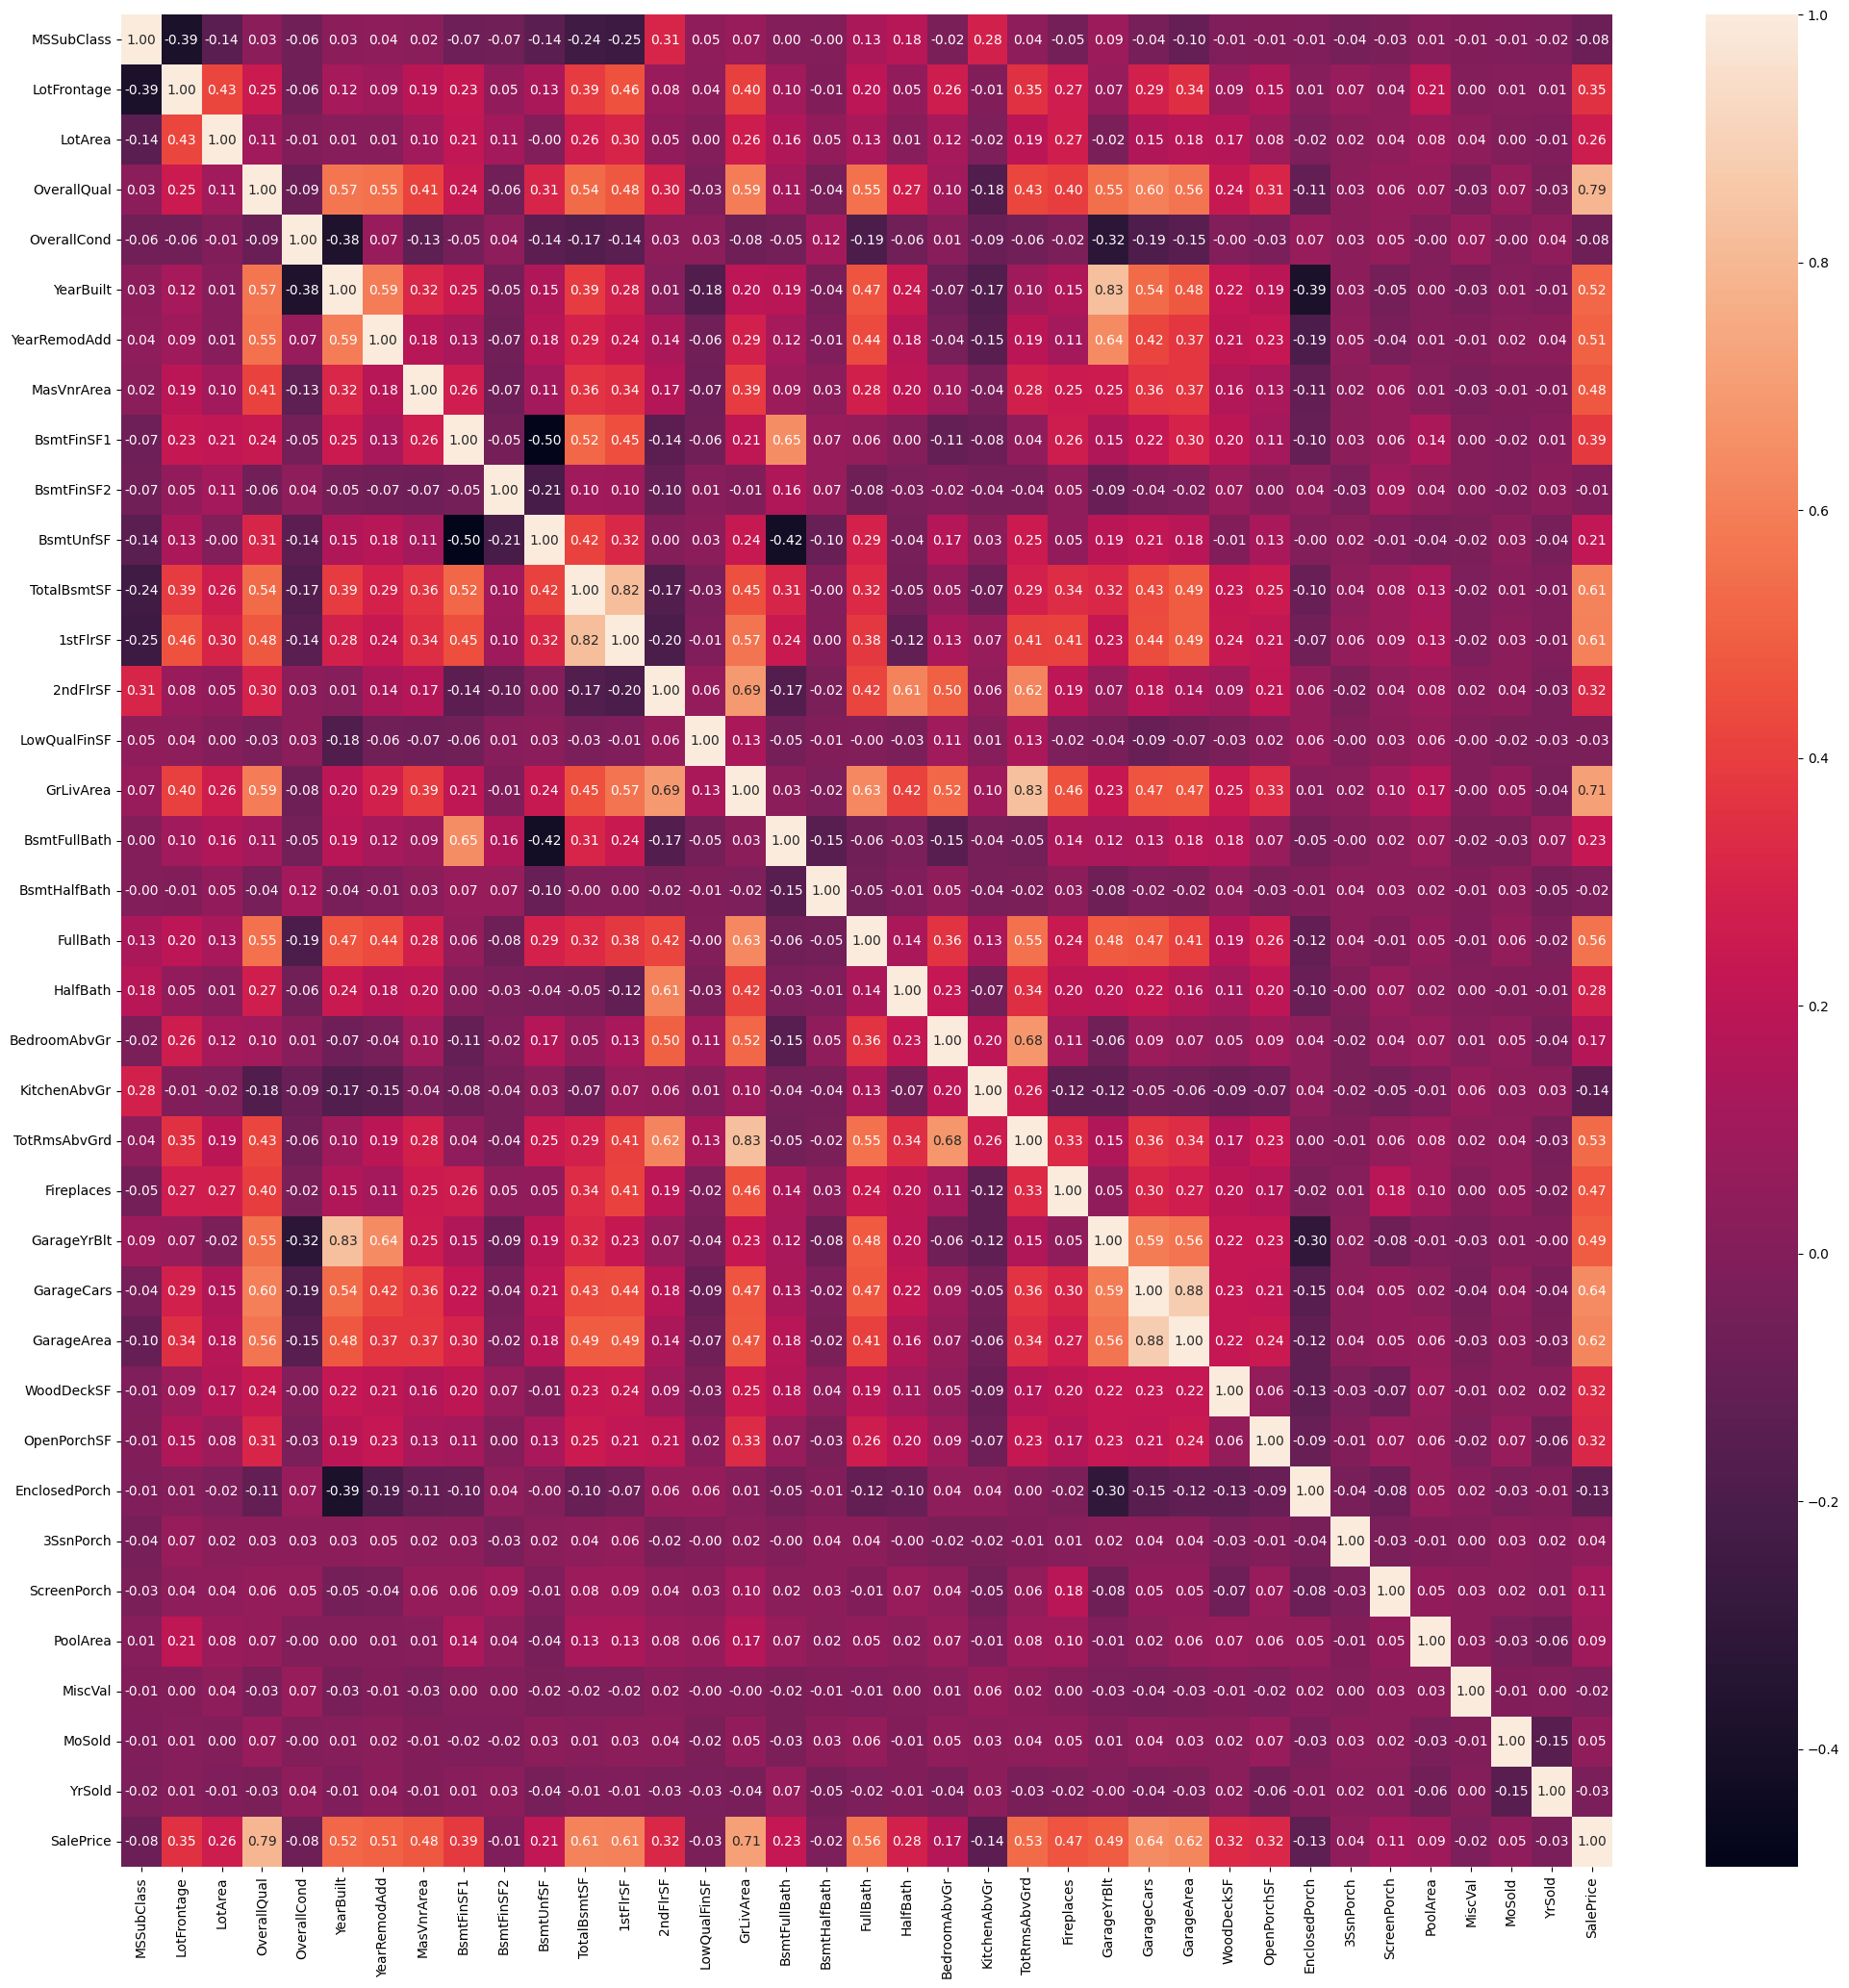

In [36]:
plt.figure(figsize=(25,25))
sns.heatmap(df[con].corr(),annot=True,fmt=".2f")

## =====================================================================================================================================

## =====================================================================================================================================

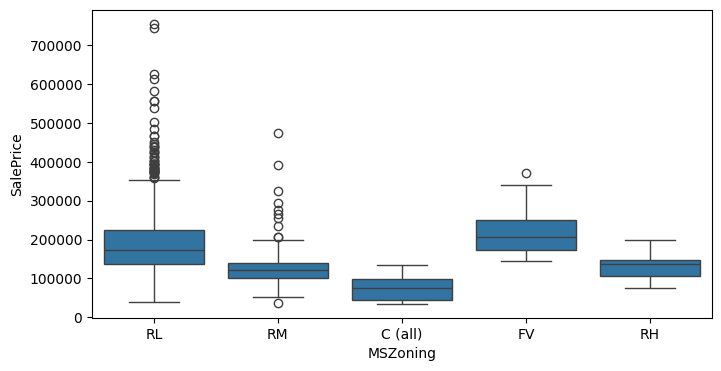

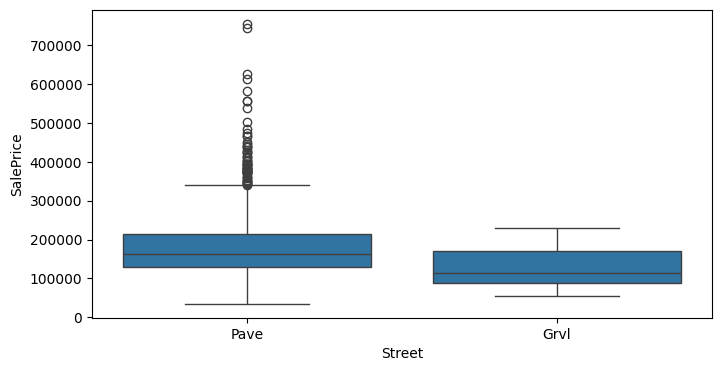

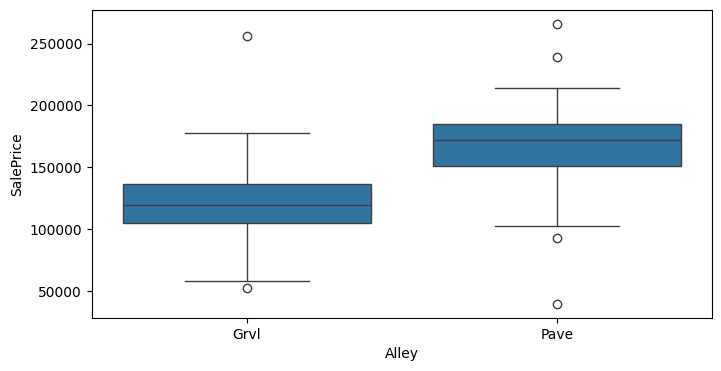

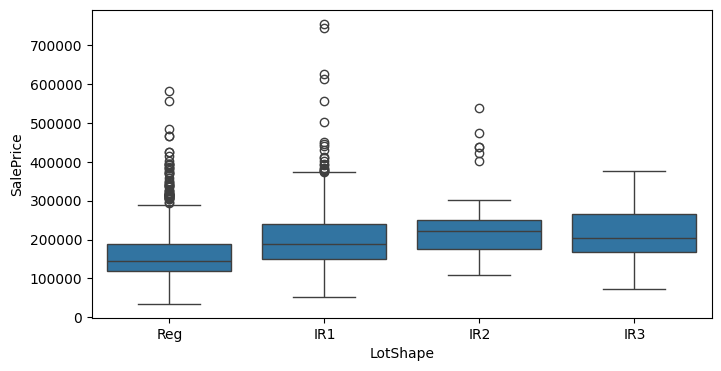

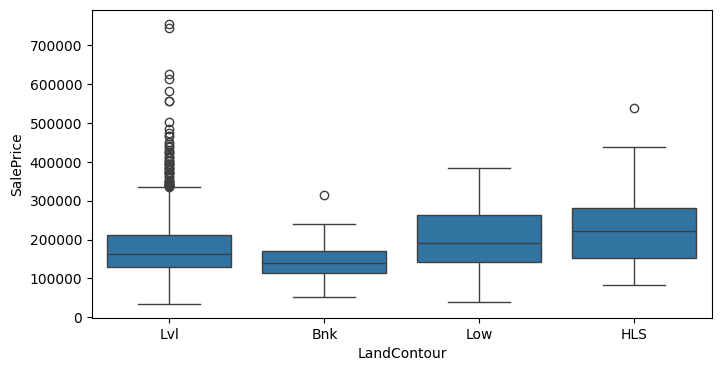

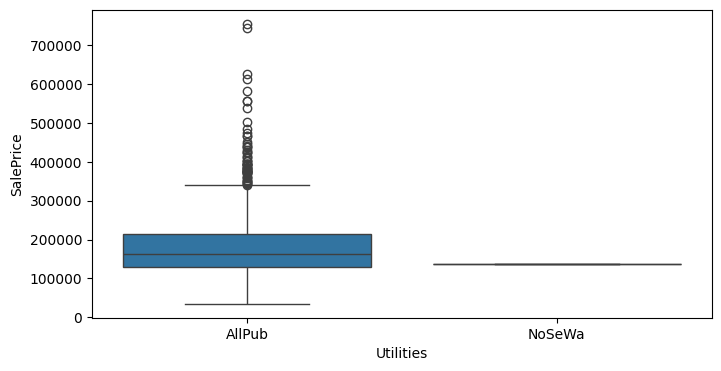

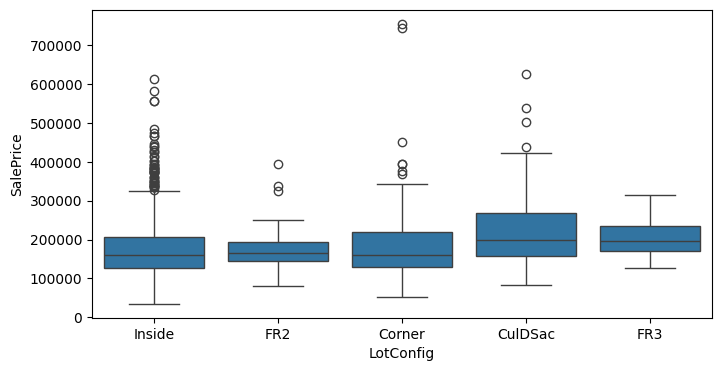

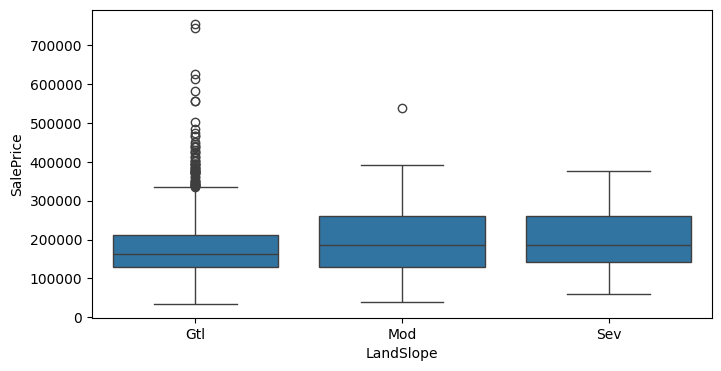

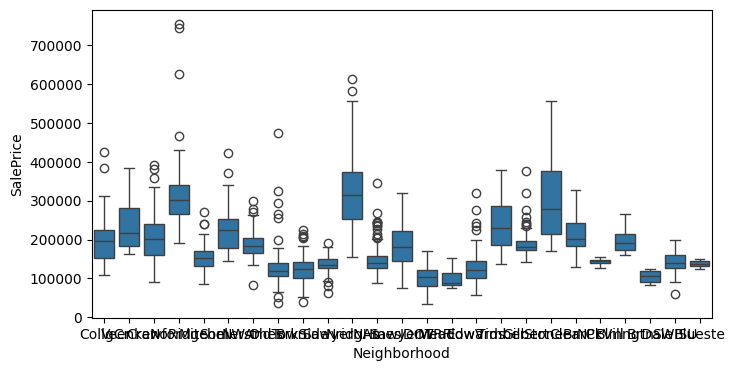

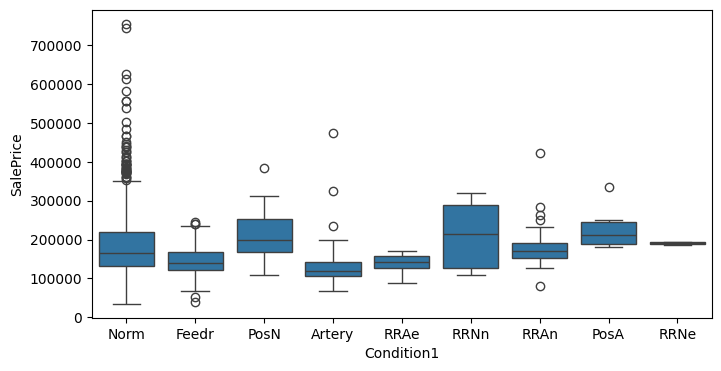

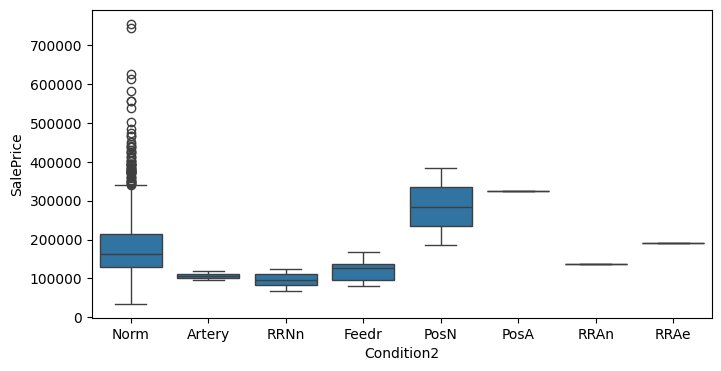

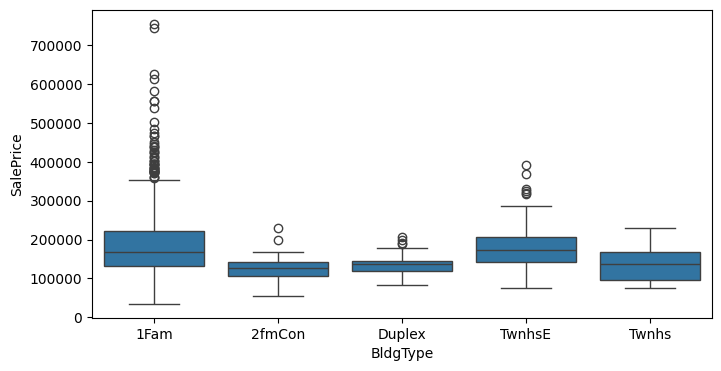

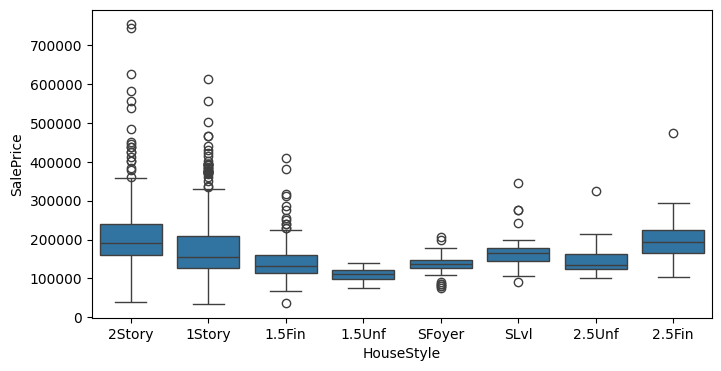

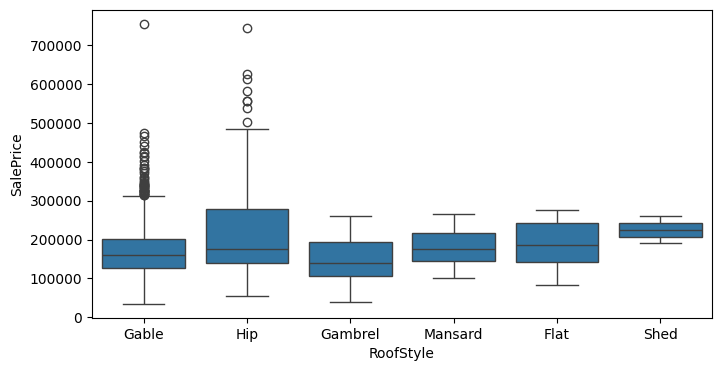

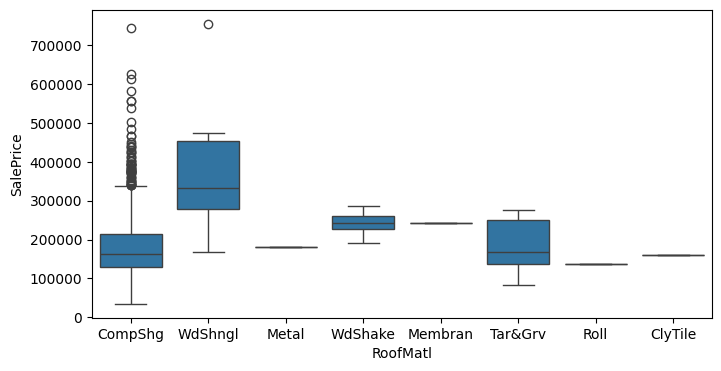

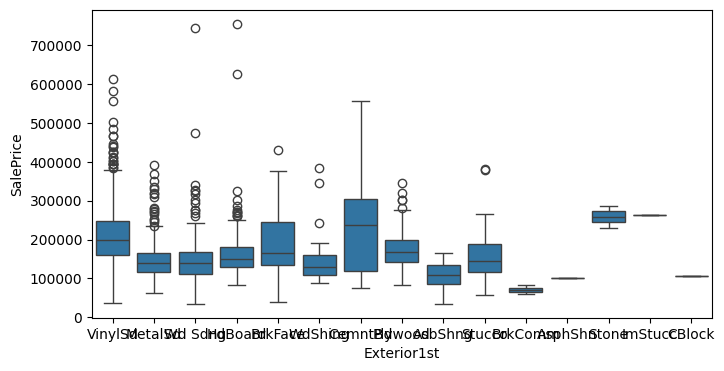

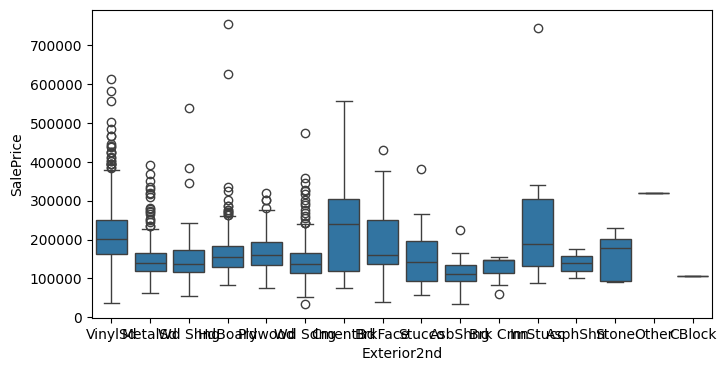

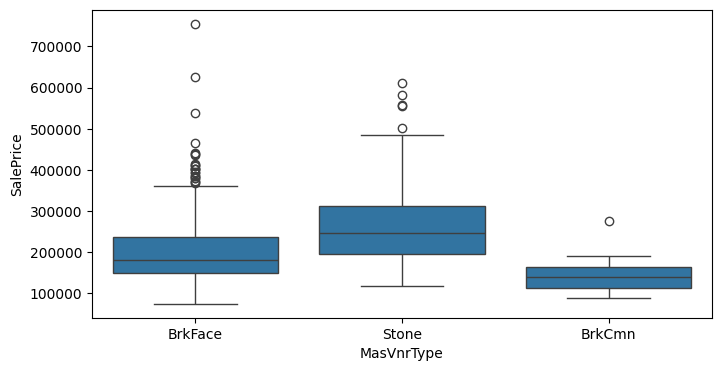

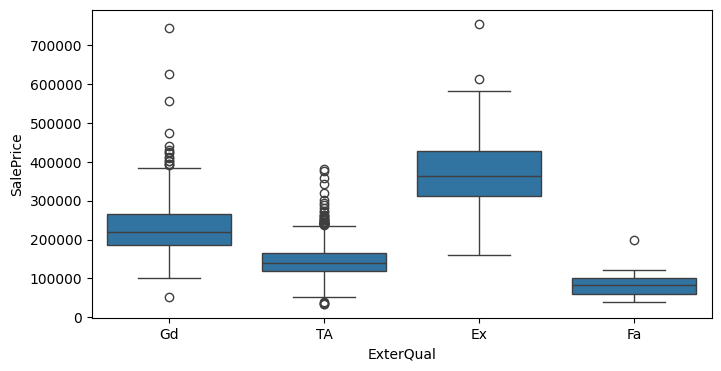

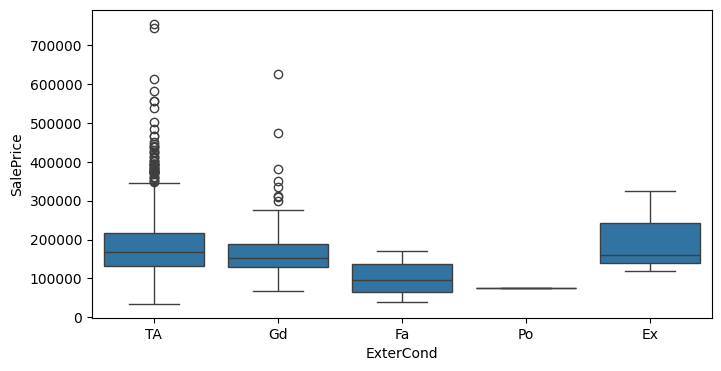

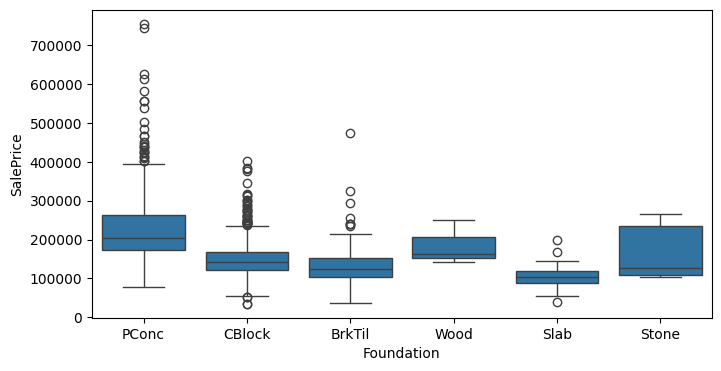

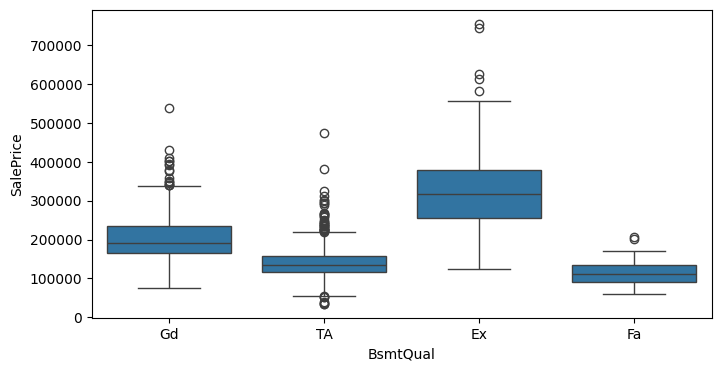

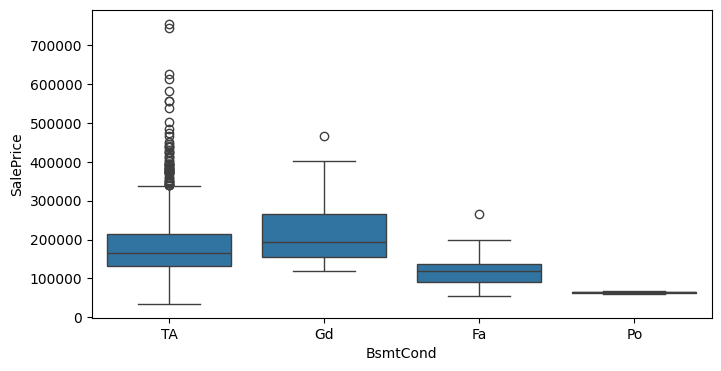

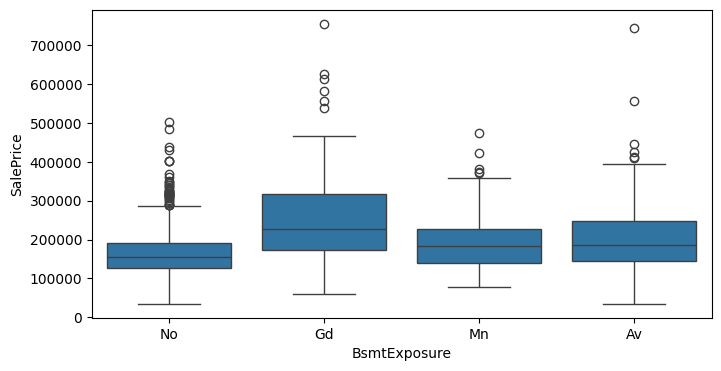

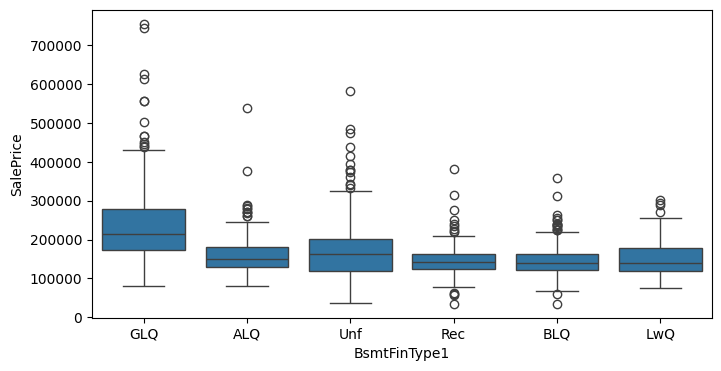

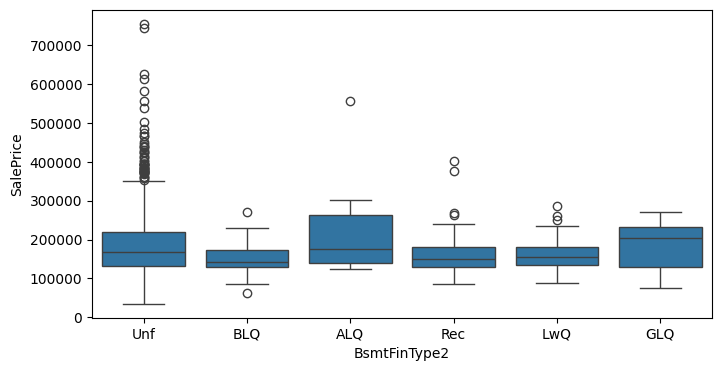

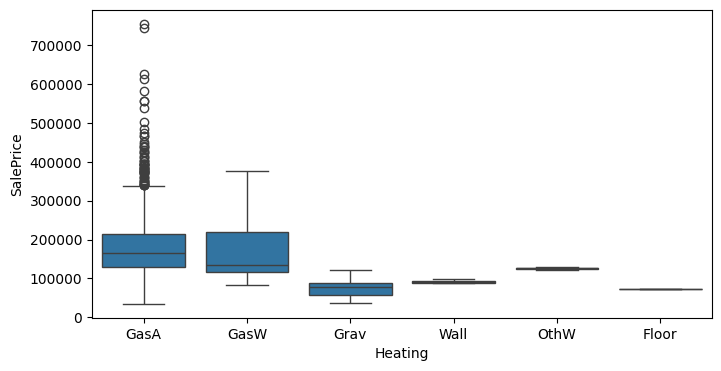

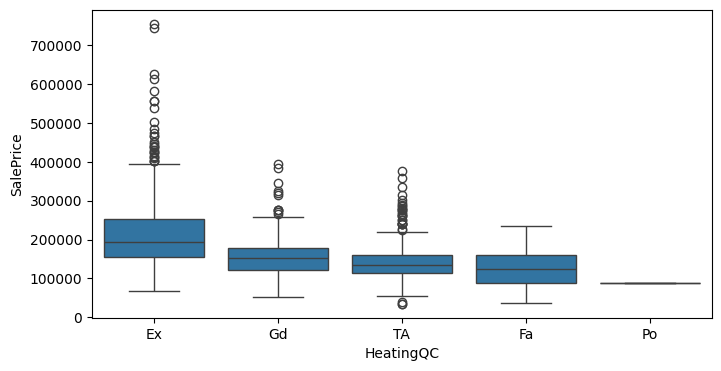

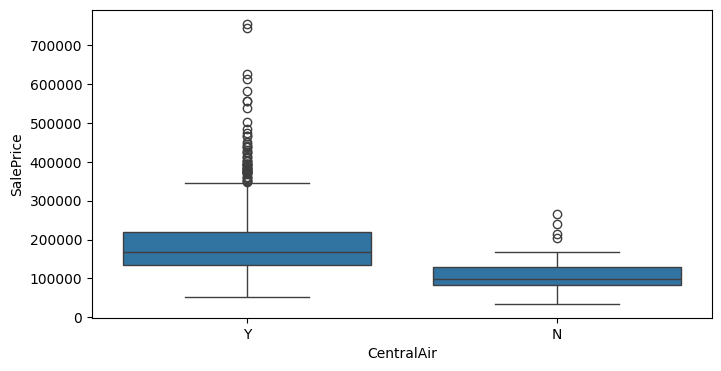

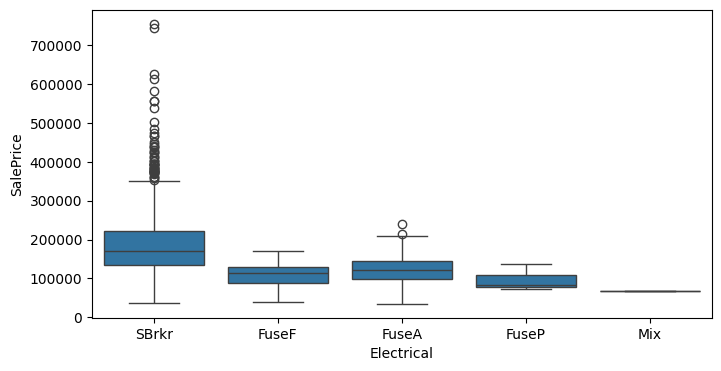

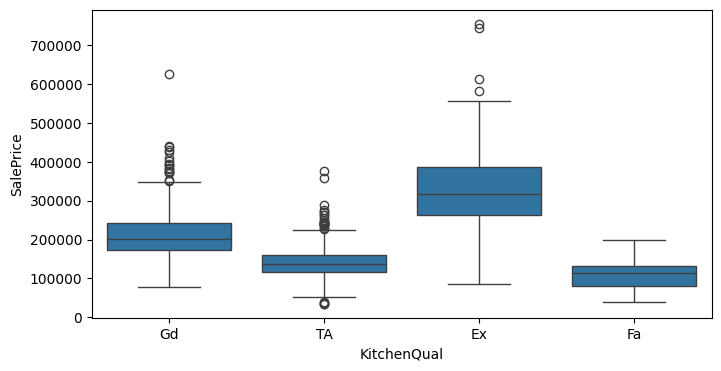

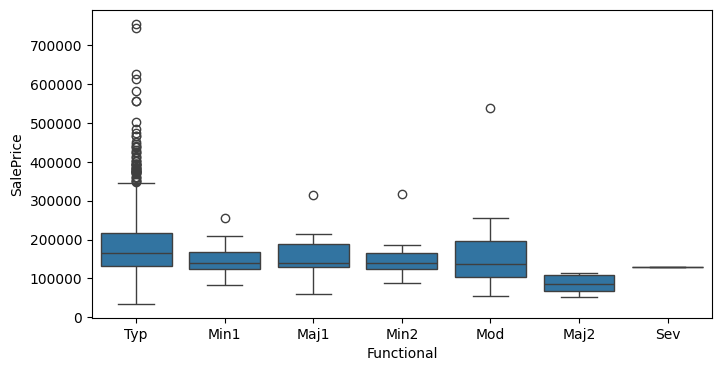

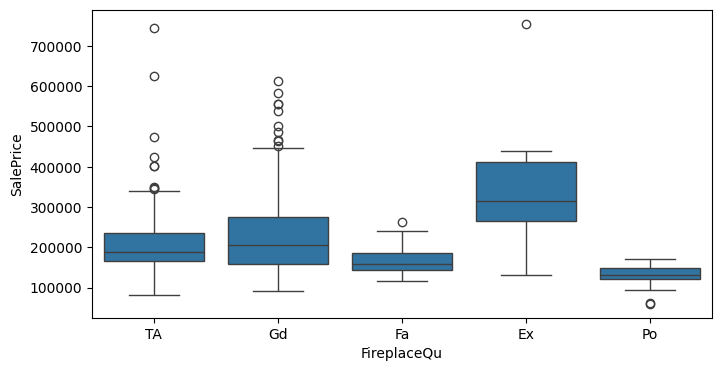

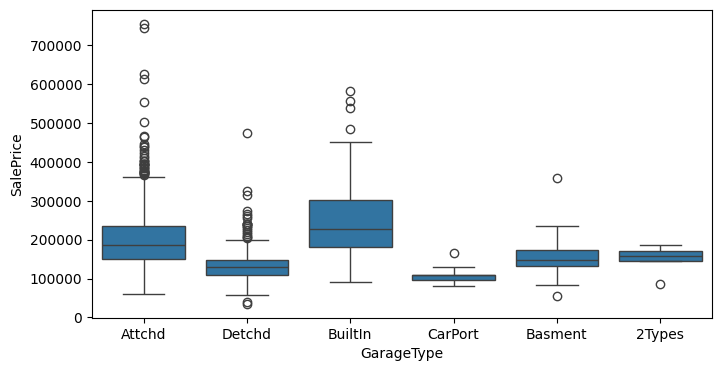

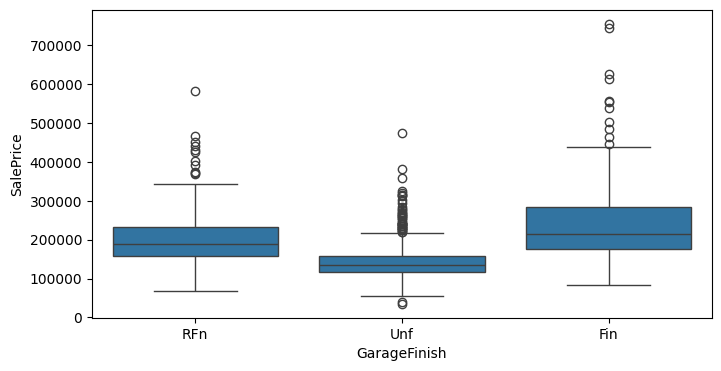

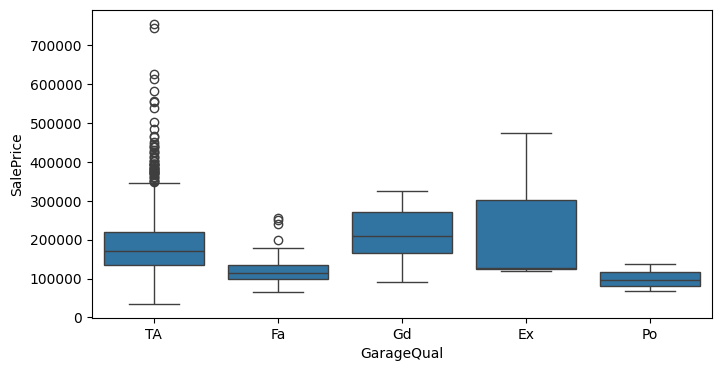

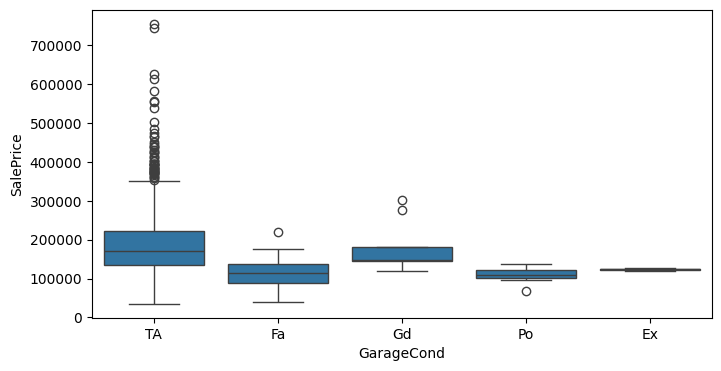

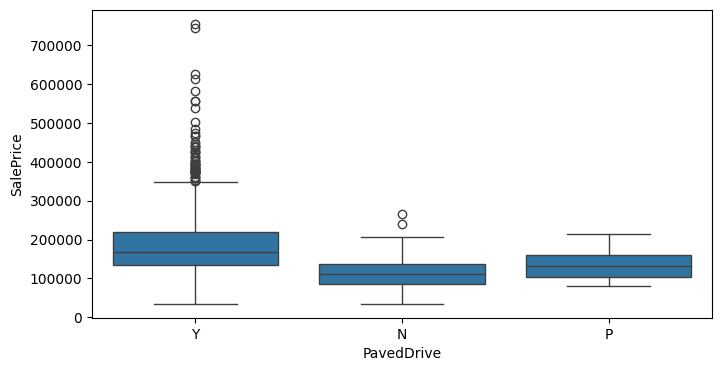

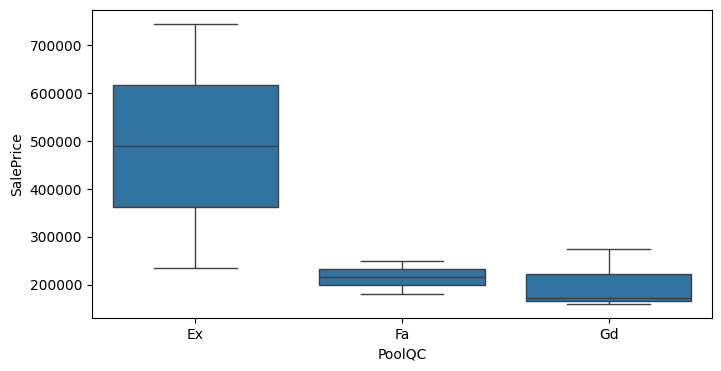

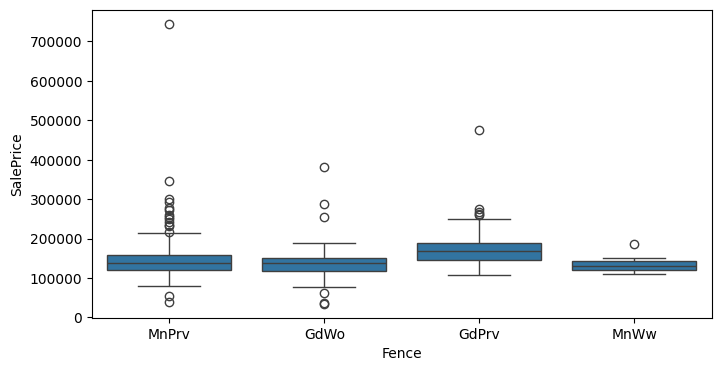

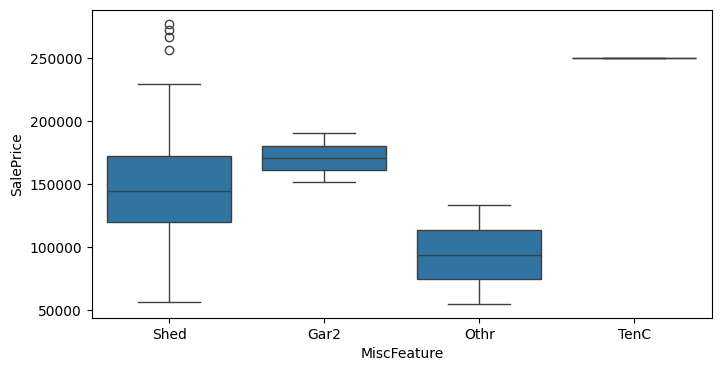

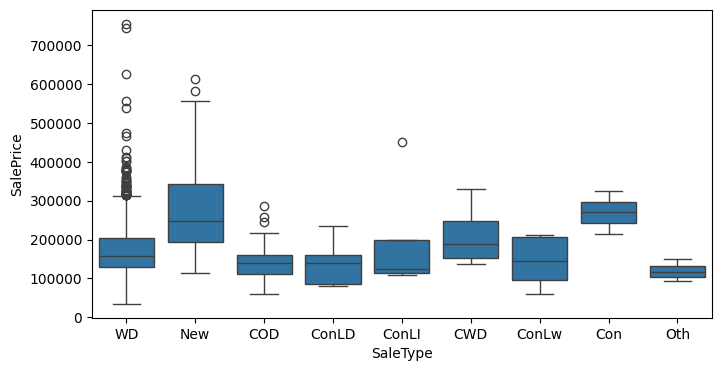

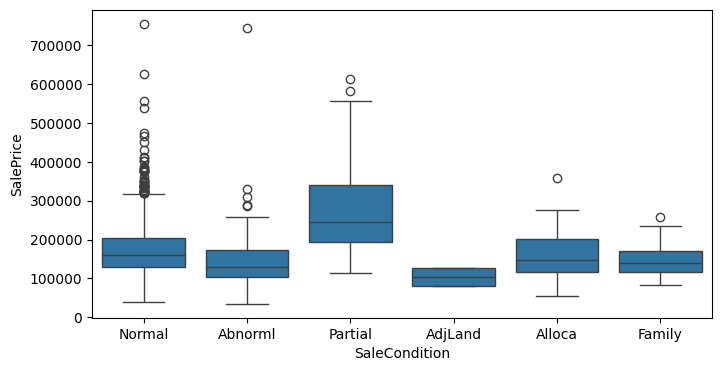

In [37]:
for i in cat:
    plt.figure(figsize=(8,4))
    sns.boxplot(df,x=i,y='SalePrice')

### Box plot observations:

1. Most of the sales are for Residential Low Density Zone and Floating Village Residential Zone
2. Paved street and Gravel alley has higher saleprices. however, it has many outliers
3. Gravel street and Paved alley has lesser saleprices, and has no/one outliers
4. Most of the houses provide aLl public Utilities 
5. streets connected to property have around 50-100 linear feet, and very few have 100-300 linear feet
6. overall quality is Excellent and condition is Typical/Average
7. Most of the houses are built around 2000 and few others are built around 1950-1980
8. Most of the hosues are remodeled in year 1950, 2000-2010 
9. Basement unfinished area is around 0-1000 and total area is around 800-1200 
11. Above ground living area is around 1000-2000
12. Most of the houses provide atleast 1 half/full bathroom

<Axes: xlabel='SaleCondition', ylabel='SaleType'>

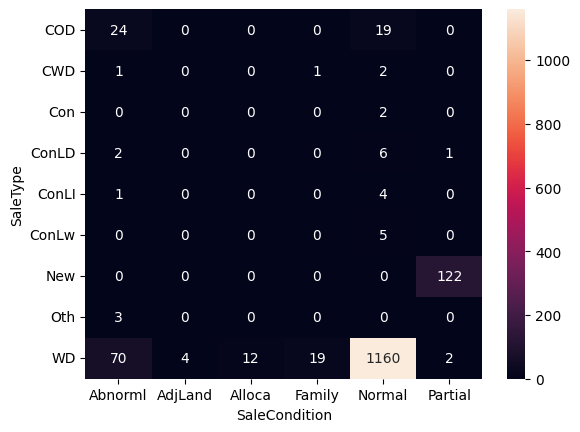

In [38]:
ctab = pd.crosstab(df['SaleType'],df['SaleCondition'])
sns.heatmap(ctab,annot=True,fmt = 'd')

<Axes: xlabel='Street', ylabel='Alley'>

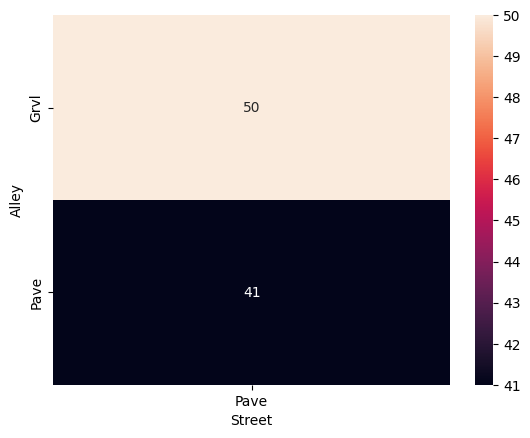

In [39]:
ctab = pd.crosstab(df['Alley'],df['Street'])
sns.heatmap(ctab,annot=True,fmt = 'd')

<Axes: xlabel='SaleCondition', ylabel='Street'>

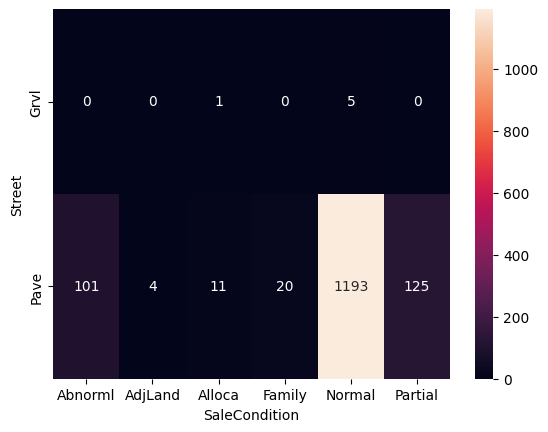

In [40]:
ctab = pd.crosstab(df['Street'],df['SaleCondition'])
sns.heatmap(ctab,annot=True,fmt = 'd')

<Axes: xlabel='ExterCond', ylabel='ExterQual'>

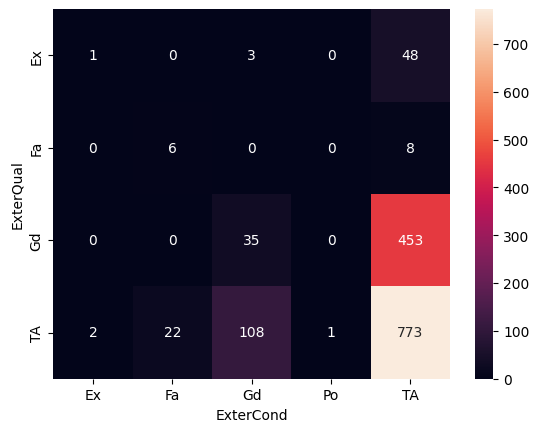

In [41]:
ctab = pd.crosstab(df['ExterQual'],df['ExterCond'])
sns.heatmap(ctab,annot=True,fmt = 'd')

<Axes: xlabel='SaleCondition', ylabel='HouseStyle'>

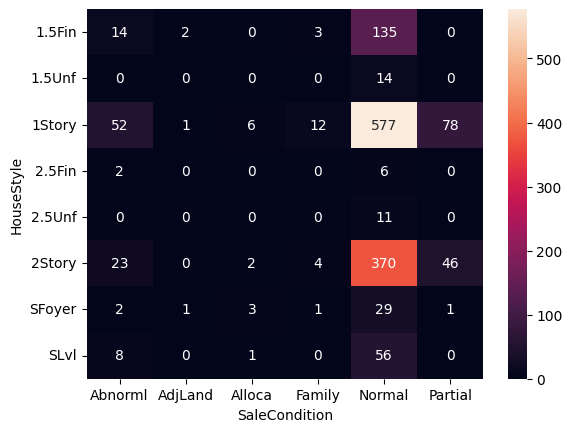

In [42]:
ctab = pd.crosstab(df['HouseStyle'],df['SaleCondition'])
sns.heatmap(ctab,annot=True,fmt = 'd')

### Cross tab Observations:
Most of the house properties have
1. Gravel alley access and Pave street access
2. Warranty Deed - Conventional SaleType and Normal Sale condition
3. External Quality and Condition as Typical/Average
4. 1story house style whose sale condition is normal. 

# Conculsions:
## Most of the highly saled house properties 
1. are in 'RL' -Residential Low Density Zone
2. have Gravel alley access and Pave street access
2. have 1 story style with Warranty Deed - Conventional SaleType and Normal Sale condition
3. having External Quality/ Condition,Kitchen Quality/ Condition  as Typical/Average
4. have Overall quality as Excellent and Overall Condition as Typical/Average
6. have full/half bathrooms, have bigger basement area 
7. are built on pconc, cblock foundation, have  Gas forced warm air furnace heating
8. provide Central AC, have Standard Circuit Breakers & Romex Electrical system
9. dont provide Pool access, fence access and any miscellaneous features
10. having 9-12 total rooms above Ground

SalePrice is recorded high during 1st,3rd and 7th month of every year.
It is also noted that sale price is high during 2000's. 